# Trabajo Final Inteligencia Artificial

## Grupo: Cecilia Belen Perez Colasanto, Jose María Klappenbach, María Pilar Artigau, Carolina Picciafuoco, Sofía Zubillaga

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Los datos en bruto de Yelp abarcan una gran cantidad de información de la plataforma de Yelp, detallando reseñas de usuarios, calificaciones de negocios y especificaciones operativas de una diversa gama de establecimientos locales.

Para ser más específicos, el conjunto de datos en bruto de Yelp contiene cinco datasets JSON diferentes:

**yelp_academic_dataset_business.json** (118.9MB) Este archivo contiene información sobre los negocios listados en Yelp. Cada registro en este dataset típicamente incluye el nombre del negocio, dirección, ciudad, estado, código postal, latitud y longitud, estrellas (calificación promedio), conteo de reseñas, categorías (por ejemplo, Restaurantes, Compras, etc.) y otros atributos como disponibilidad de estacionamiento o si es accesible para sillas de ruedas.

**yelp_academic_dataset_checkin.json** (287MB) El archivo de registros de entrada (check-in) proporciona datos sobre las visitas de los usuarios a los negocios a lo largo del tiempo. Incluye el ID del negocio y una serie de marcas de tiempo que indican cuándo los usuarios hicieron check-in en ese lugar, ofreciendo información sobre la popularidad del negocio en diferentes momentos y días.

**yelp_academic_dataset_review.json** (5.34GB) Este dataset contiene reseñas escritas por usuarios para los negocios. Cada reseña incluye el ID del usuario, el ID del negocio, las estrellas otorgadas (de 1 a 5), votos útiles/divertidos/geniales, el texto de la reseña y la fecha en que se publicó. Estos datos pueden utilizarse para analizar el sentimiento del cliente, evaluar la calidad del servicio y más.

**yelp_academic_dataset_tip.json** (180.6MB) Las recomendaciones son mensajes cortos dejados por los usuarios sobre un negocio, a menudo conteniendo sugerencias, cumplidos o consejos para futuros clientes. Este archivo incluye información como el texto de la recomendación, la fecha en que se dejó, el ID del negocio y el ID del usuario. Las recomendaciones proporcionan retroalimentación rápida e informativa sobre un negocio.

**yelp_academic_dataset_user.json** (3.36GB) Este archivo contiene datos sobre los usuarios de Yelp, incluyendo su ID de usuario, nombre, conteo de reseñas, desde cuándo están en Yelp (la fecha en que se unieron), amigos (una lista de IDs de usuario que representan sus amigos en Yelp), conteos de votos útiles/divertidos/geniales que han recibido, fans (el número de usuarios que los han marcado como "fan") y su promedio de estrellas otorgadas. Puede usarse para analizar el comportamiento de los usuarios, redes sociales e influencia en Yelp.

## Variables:

- **`business_id`**: Un identificador único para cada negocio listado en el conjunto de datos. (no nulo, objeto)
- **`name`**: El nombre del negocio. (no nulo, objeto)
- **`address`**: La dirección del negocio. (no nulo, objeto)
- **`city`**: La ciudad donde se encuentra el negocio. (no nulo, objeto)
- **`state`**: El estado o región donde se encuentra el negocio. (no nulo, objeto)
- **`postal_code`**: El código postal asociado a la ubicación del negocio. (no nulo, objeto)
- **`latitude`**: La coordenada de latitud del negocio para el mapeo geográfico. (no nulo, float64)
- **`longitude`**: La coordenada de longitud del negocio para el mapeo geográfico. (no nulo, float64)
- **`stars_x`**: La calificación promedio de estrellas del negocio. (no nulo, float64)
- **`review_count`**: El número de reseñas que ha recibido el negocio. (no nulo, int64)
- **`is_open`**: Una variable binaria que indica si el negocio está abierto (1) o cerrado (0). (no nulo, int64)
- **`attributes`**: Una colección de atributos sobre el negocio, como 'Acepta tarjetas de crédito', 'Estacionamiento', 'Wi-Fi', etc. (con valores faltantes en 493 filas de un total de 200,000 filas, objeto)
- **`categories`**: Las categorías en las que se encuentra el negocio, como 'Restaurantes', 'Comida', 'Café', etc. (no nulo, objeto)
- **`hours`**: El horario de funcionamiento del negocio. (con valores faltantes en 6,905 filas de un total de 200,000 filas, objeto)
- **`review_id`**: Un identificador único para cada reseña. (no nulo, objeto)
- **`user_id`**: Un identificador único para cada usuario que ha dejado una reseña. (no nulo, objeto)
- **`stars_y`**: La calificación de estrellas otorgada por el usuario en su reseña. (no nulo, float64)
- **`useful`**: El número de usuarios que encontraron útil la reseña. (no nulo, int64)
- **`funny`**: El número de usuarios que encontraron divertida la reseña. (no nulo, int64)
- **`cool`**: El número de usuarios que encontraron genial la reseña. (no nulo, int64)
- **`text`**: El contenido textual de la reseña. (no nulo, objeto)
- **`date`**: La fecha en que se publicó la reseña. (no nulo, objeto)

# Cargamos el Dataset

In [ ]:
from datasets import load_dataset

ds = load_dataset("Johnnyeee/Yelpdata_663", split="train")
print(ds)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars_x', 'review_count', 'is_open', 'categories', 'hours', 'review_id', 'user_id', 'stars_y', 'useful', 'funny', 'cool', 'text', 'date', 'attributes'],
    num_rows: 3778658
})


In [ ]:
df = ds.to_pandas()
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,attributes
0,XQfwVwDr-v0ZS3_CbbE5Xw,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,19454,40.210197,-75.223640,3.0,169.0,...,"{""Monday"": ""7:30-15:0"", ""Tuesday"": ""7:30-15:0""...",KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,"{""NoiseLevel"": ""u'average'"", ""HasTV"": ""False"",..."
1,YjUWPpI6HXG530lwP-fb2A,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,AZ,85713,32.207233,-110.980865,3.5,47.0,...,null,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,"{""RestaurantsReservations"": ""True"", ""BusinessP..."
2,kxX2SOes4o-D3ZQBkiMRfA,Zaika,2481 Grant Ave,Philadelphia,PA,19114,40.079849,-75.025078,4.0,181.0,...,"{""Tuesday"": ""11:0-21:0"", ""Wednesday"": ""11:0-21...",AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,"{""Caters"": ""True"", ""Ambience"": ""{'romantic': F..."
3,e4Vwtrqf-wpJfwesgvdgxQ,Melt,2549 Banks St,New Orleans,LA,70119,29.962103,-90.087959,4.0,32.0,...,"{""Monday"": ""0:0-0:0"", ""Friday"": ""11:0-17:0"", ""...",Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,"{""BusinessParking"": ""{'garage': False, 'street..."
4,04UD14gamNjLY0IDYVhHJg,Dmitri's,795 S 3rd St,Philadelphia,PA,19147,39.938015,-75.148132,4.0,273.0,...,"{""Wednesday"": ""17:30-21:0"", ""Thursday"": ""17:30...",JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,1.0,1.0,2.0,1.0,I am a long term frequent customer of this est...,2015-09-23 23:10:31,"{""BusinessParking"": ""{'garage': False, 'street..."


# **Filtrado**

In [ ]:
print(f"El dataset tiene {len(df)} filas y {len(df.columns)} columnas")

El dataset tiene 3778658 filas y 22 columnas


Como nuesto dataset tiene demasiadas filas con datos, para simplificar el analisis y que el codigo corra con mayor rapides, filtraremos por una ciudad.

In [ ]:
df['city'].nunique()

920

In [ ]:
df.groupby(by="city").count().sort_values("text", ascending = False).head(20)

,business_id,name,address,state,postal_code,latitude,longitude,stars_x,review_count,is_open,...,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,attributes
city,,,,,,,,,,,,,,,,,,,,,
Philadelphia,549325,549325,549325,549325,549325,549325,549325,549325,549325,549325,...,549325,549325,549325,549325,549325,549325,549325,549325,549325,549325
New Orleans,381102,381102,381102,381102,381102,381102,381102,381102,381102,381102,...,381102,381102,381102,381102,381102,381102,381102,381102,381102,381102
Nashville,260493,260493,260493,260493,260493,260493,260493,260493,260493,260493,...,260493,260493,260493,260493,260493,260493,260493,260493,260493,260493
Tampa,242445,242445,242445,242445,242445,242445,242445,242445,242445,242445,...,242445,242445,242445,242445,242445,242445,242445,242445,242445,242445
Indianapolis,200363,200363,200363,200363,200363,200363,200363,200363,200363,200363,...,200363,200363,200363,200363,200363,200363,200363,200363,200363,200363
Tucson,199868,199868,199868,199868,199868,199868,199868,199868,199868,199868,...,199868,199868,199868,199868,199868,199868,199868,199868,199868,199868
Reno,160537,160537,160537,160537,160537,160537,160537,160537,160537,160537,...,160537,160537,160537,160537,160537,160537,160537,160537,160537,160537
Saint Louis,142854,142854,142854,142854,142854,142854,142854,142854,142854,142854,...,142854,142854,142854,142854,142854,142854,142854,142854,142854,142854
Santa Barbara,130077,130077,130077,130077,130077,130077,130077,130077,130077,130077,...,130077,130077,130077,130077,130077,130077,130077,130077,130077,130077


Nos quedamos con la ciudad de Brandon, que es una de las que contienen mayor cantidad de reseñas.

In [ ]:
df_sb = df[df['city'] == "Brandon"]
df_sb.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,attributes
307,ZpXZgnBrNodHH8pKpOK_Kg,Jesse's Steak and Seafood,524 W Brandon Blvd,Brandon,FL,33511,27.938135,-82.292076,4.0,267.0,...,"{""Monday"": ""11:0-21:0"", ""Tuesday"": ""11:0-21:0""...",fFX81fVi2KpnlR7CN7ht_A,Tf9sX1pSq5auLh3CAT9TaQ,4.0,1.0,0.0,0.0,My boyfriend and I both decided to try Jesse's...,2018-04-15 13:21:32,"{""Alcohol"": ""u'full_bar'"", ""RestaurantsGoodFor..."
580,ew_Hhp12Silh3qjoPaW9IA,Thai Legacy Restaurant,120 N Parsons Ave,Brandon,FL,33510,27.938719,-82.286095,4.5,203.0,...,"{""Wednesday"": ""11:0-20:0"", ""Thursday"": ""11:0-2...",09hEaV-z00xdrGThgQXUdg,jqEBRwNaBNK4dZhCjZx2tQ,5.0,0.0,0.0,0.0,"So much care is given to healthy, delicious fo...",2018-09-25 11:13:48,"{""RestaurantsDelivery"": ""False"", ""Caters"": ""Tr..."
692,U0ICWpbd1C0GD9SpIv3bSA,Outback Steakhouse,"2020 Brandon Blvd, Ste 190",Brandon,FL,33511,27.938475,-82.318344,3.5,165.0,...,"{""Monday"": ""11:0-22:0"", ""Tuesday"": ""11:0-22:0""...",jpThMSnG2zJrhmSnn_PADQ,x5DJdEvWFh1cKBkPO9jNsw,4.0,0.0,0.0,0.0,"I came in for lunch, my group totaled eight hu...",2011-11-30 06:52:11,"{""GoodForKids"": ""True"", ""RestaurantsTakeOut"": ..."
718,NwJoFxmYRDxVGXgPtrjQ3w,Ploy Thai,1941 W Brandon Blvd,Brandon,FL,33511,27.936798,-82.316132,4.0,171.0,...,"{""Monday"": ""17:0-21:0"", ""Tuesday"": ""17:0-21:0""...",MtRjGfagShXjUWWT8wNcUw,to2os_TcWhGmtPmOGITXIg,5.0,0.0,0.0,0.0,Wow. I have to say incredible. We've driven ...,2013-08-03 15:17:23,"{""BusinessAcceptsCreditCards"": ""True"", ""Restau..."
759,NwJoFxmYRDxVGXgPtrjQ3w,Ploy Thai,1941 W Brandon Blvd,Brandon,FL,33511,27.936798,-82.316132,4.0,171.0,...,"{""Monday"": ""17:0-21:0"", ""Tuesday"": ""17:0-21:0""...",Lun9ta1qn_pmuD1VqxiYmg,9gSuVhKyOx3Qn4oI6EQMaA,4.0,0.0,0.0,0.0,Went there for lunch and was pleasantly surpri...,2009-10-14 21:16:08,"{""BusinessAcceptsCreditCards"": ""True"", ""Restau..."


Ahora, dado que tenemos una unica ciudad y estado, podemos eliminar las columnas de `state` y de `city`.

In [ ]:
df_sb.drop(columns = ['postal_code',"state", "city"], inplace = True)
df_sb.head()

<ipython-input-9-7f262c220578>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sb.drop(columns = ['postal_code',"state", "city"], inplace = True)


,business_id,name,address,latitude,longitude,stars_x,review_count,is_open,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,attributes
307,ZpXZgnBrNodHH8pKpOK_Kg,Jesse's Steak and Seafood,524 W Brandon Blvd,27.938135,-82.292076,4.0,267.0,1.0,"Sandwiches, Steakhouses, Restaurants, Seafood","{""Monday"": ""11:0-21:0"", ""Tuesday"": ""11:0-21:0""...",fFX81fVi2KpnlR7CN7ht_A,Tf9sX1pSq5auLh3CAT9TaQ,4.0,1.0,0.0,0.0,My boyfriend and I both decided to try Jesse's...,2018-04-15 13:21:32,"{""Alcohol"": ""u'full_bar'"", ""RestaurantsGoodFor..."
580,ew_Hhp12Silh3qjoPaW9IA,Thai Legacy Restaurant,120 N Parsons Ave,27.938719,-82.286095,4.5,203.0,1.0,"Food, Thai, Restaurants, Desserts, Vegan","{""Wednesday"": ""11:0-20:0"", ""Thursday"": ""11:0-2...",09hEaV-z00xdrGThgQXUdg,jqEBRwNaBNK4dZhCjZx2tQ,5.0,0.0,0.0,0.0,"So much care is given to healthy, delicious fo...",2018-09-25 11:13:48,"{""RestaurantsDelivery"": ""False"", ""Caters"": ""Tr..."
692,U0ICWpbd1C0GD9SpIv3bSA,Outback Steakhouse,"2020 Brandon Blvd, Ste 190",27.938475,-82.318344,3.5,165.0,1.0,"Restaurants, Steakhouses","{""Monday"": ""11:0-22:0"", ""Tuesday"": ""11:0-22:0""...",jpThMSnG2zJrhmSnn_PADQ,x5DJdEvWFh1cKBkPO9jNsw,4.0,0.0,0.0,0.0,"I came in for lunch, my group totaled eight hu...",2011-11-30 06:52:11,"{""GoodForKids"": ""True"", ""RestaurantsTakeOut"": ..."
718,NwJoFxmYRDxVGXgPtrjQ3w,Ploy Thai,1941 W Brandon Blvd,27.936798,-82.316132,4.0,171.0,1.0,"Thai, Sushi Bars, Restaurants","{""Monday"": ""17:0-21:0"", ""Tuesday"": ""17:0-21:0""...",MtRjGfagShXjUWWT8wNcUw,to2os_TcWhGmtPmOGITXIg,5.0,0.0,0.0,0.0,Wow. I have to say incredible. We've driven ...,2013-08-03 15:17:23,"{""BusinessAcceptsCreditCards"": ""True"", ""Restau..."
759,NwJoFxmYRDxVGXgPtrjQ3w,Ploy Thai,1941 W Brandon Blvd,27.936798,-82.316132,4.0,171.0,1.0,"Thai, Sushi Bars, Restaurants","{""Monday"": ""17:0-21:0"", ""Tuesday"": ""17:0-21:0""...",Lun9ta1qn_pmuD1VqxiYmg,9gSuVhKyOx3Qn4oI6EQMaA,4.0,0.0,0.0,0.0,Went there for lunch and was pleasantly surpri...,2009-10-14 21:16:08,"{""BusinessAcceptsCreditCards"": ""True"", ""Restau..."


In [ ]:
print(f"Tenemos {df_sb['review_id'].duplicated().sum()} reseñas duplicadas")

Tenemos 0 reseñas duplicadas


In [ ]:
print(f"Tenemos {df_sb[['business_id']].duplicated().sum()} filas duplicadas")

Tenemos 23680 filas duplicadas


In [ ]:
# Verificar si cada business_id tiene solo un name
business_id_counts = df_sb.groupby('business_id')['name'].nunique().reset_index()
business_id_counts.columns = ['business_id', 'unique_names']

# Verificar si cada name está asociado a un solo business_id
name_counts = df_sb.groupby('name')['business_id'].nunique().reset_index()
name_counts.columns = ['name', 'unique_business_ids']

business_id_counts_sorted = business_id_counts.sort_values(by='unique_names', ascending=False)
name_counts_sorted = name_counts.sort_values(by='unique_business_ids', ascending=False)

business_id_counts_sorted

,business_id,unique_names
325,zxPcNvM4aPZu6gUmTFkazQ,1
0,-2YZIUArmrIMVVBi8CT47w,1
1,-H6s1c2NRic5UKxXqi4FdQ,1
2,-QpRF-N2_Pga52VgNMipNA,1
3,-dEuJqTHuE6rv8MrndqoXA,1
...,...,...
9,0Q3dz7rAU8aMelrTZW2yMw,1
10,0n0WHhp0jvJI8ivbJQYpeQ,1
11,13RE3PJCdPhWy3ij1RW3Tg,1
12,1BrkEUTKNKQvNz9mMbTtrg,1


In [ ]:
name_counts_sorted

,name,unique_business_ids
154,McDonald's,4
273,Tropical Smoothie Cafe,3
62,Chipotle Mexican Grill,3
114,Jersey Mike's Subs,3
55,Chick-fil-A,3
...,...,...
102,Hokulia Shave Ice,1
101,Ho Ho Chinese Restaurant,1
100,Hey Mon Caribbean Cooking Magic,1
99,Hawk N Hog,1


Como podemos ver, hay restaurantes que tienen mas de un business id.

Veamos si hay filas duplicadas.

Filtramos un por un restaurante y podmeos ver que por ejemplo McDonald's tiene mas de un bussines id porque tiene multiples sucursales. Esto es logico dado que es una franquicia.

In [ ]:
df_sb[df_sb.name == "McDonald's"]

,business_id,name,address,latitude,longitude,stars_x,review_count,is_open,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,attributes
16940,9DhjKaR2f9wKATnUvxBAgg,McDonald's,11212 Causway Blvd,27.923798,-82.323311,1.5,29.0,1.0,"Coffee & Tea, Food, Burgers, Fast Food, Restau...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""0:0-0:0"", ""W...",vSuc-2Zs3ZZKziKcA1eogA,TonsWEDFrkIB-tTDLTz83A,2.0,0.0,0.0,0.0,As I said service sucked ordered my food got t...,2017-08-10 03:06:20,"{""OutdoorSeating"": ""True"", ""RestaurantsTakeOut..."
40314,A1lAqN3SOaBLoo6NqVcy4Q,McDonald's,11110 Causeway Blvd,27.925331,-82.325394,2.0,6.0,1.0,"Sandwiches, Burgers, Food, Fast Food, Restaura...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""0:0-0:0"", ""W...",doPrttX4NPboAP1q_61KNg,EhdMH7wClMRmFvkVCOeBEg,1.0,0.0,0.0,0.0,I have lived in this area for four years. I've...,2015-09-02 02:58:02,"{""RestaurantsGoodForGroups"": ""True"", ""Restaura..."
61584,9DhjKaR2f9wKATnUvxBAgg,McDonald's,11212 Causway Blvd,27.923798,-82.323311,1.5,29.0,1.0,"Coffee & Tea, Food, Burgers, Fast Food, Restau...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""0:0-0:0"", ""W...",mC9WCjvosHMnYi0pi_zLOw,dPLy5fBNwRoVNSVSwTrpyw,4.0,0.0,0.0,0.0,Went through the drive-thru real quick. I was ...,2015-03-25 18:55:52,"{""OutdoorSeating"": ""True"", ""RestaurantsTakeOut..."
71105,9DhjKaR2f9wKATnUvxBAgg,McDonald's,11212 Causway Blvd,27.923798,-82.323311,1.5,29.0,1.0,"Coffee & Tea, Food, Burgers, Fast Food, Restau...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""0:0-0:0"", ""W...",0OftciUVyllvQn6Ti9tTqw,26fbXLwwBcP2EC6MaffBfA,1.0,0.0,0.0,0.0,I will not go back thay will try to rip you of...,2014-03-04 07:00:10,"{""OutdoorSeating"": ""True"", ""RestaurantsTakeOut..."
84465,9DhjKaR2f9wKATnUvxBAgg,McDonald's,11212 Causway Blvd,27.923798,-82.323311,1.5,29.0,1.0,"Coffee & Tea, Food, Burgers, Fast Food, Restau...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""0:0-0:0"", ""W...",0mAwRP3MEufI5a0jqBSq6g,X1XakBJy2EG6k4k7omBH4w,2.0,0.0,0.0,0.0,"The staff are nice, and the service is fast as...",2013-04-26 15:53:26,"{""OutdoorSeating"": ""True"", ""RestaurantsTakeOut..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576272,VTOeRnkozjB4wLJhWhS3BA,McDonald's,985 E Bloomingdale Ave,27.893238,-82.270432,2.0,32.0,1.0,"Restaurants, Food, Coffee & Tea, Fast Food, Bu...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""0:0-0:0"", ""W...",s_wD1fFy7jbceDYNZ6i6OA,OrO2OU8DxlvRSgiJcndE9Q,4.0,1.0,0.0,0.0,I think everyone in this particular McDonald's...,2016-08-25 17:18:00,"{""BusinessAcceptsCreditCards"": ""True"", ""Restau..."
2595455,VTOeRnkozjB4wLJhWhS3BA,McDonald's,985 E Bloomingdale Ave,27.893238,-82.270432,2.0,32.0,1.0,"Restaurants, Food, Coffee & Tea, Fast Food, Bu...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""0:0-0:0"", ""W...",GLhKz6vS6R_-yX2KSi1n-g,XF3_1cOZLU-pbIzpoUH5xQ,1.0,0.0,0.0,0.0,Worst service I have ever seen any at any fast...,2018-06-27 00:17:15,"{""BusinessAcceptsCreditCards"": ""True"", ""Restau..."
2596069,VTOeRnkozjB4wLJhWhS3BA,McDonald's,985 E Bloomingdale Ave,27.893238,-82.270432,2.0,32.0,1.0,"Restaurants, Food, Coffee & Tea, Fast Food, Bu...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""0:0-0:0"", ""W...",Nfcfc0ZcWvNoSBkx8sSo6w,Jp2mErKTl_1k7MV5-2Orow,1.0,0.0,0.0,0.0,The management at this location is completely ...,2021-09-19 09:01:36,"{""BusinessAcceptsCreditCards"": ""True"", ""Restau..."
2600241,VTOeRnkozjB4wLJhWhS3BA,McDonald's,985 E Bloomingdale Ave,27.893238,-82.270432,2.0,32.0,1.0,"Restaurants, Food, Coffee & Tea, Fast Food, Bu...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""0:0-0:0"", ""W...",aqG8quZpAKBQvB58xdyKtQ,mEuVU6My5p7o-g7GUP4PlA,1.0,1.0,0.0,0.0,Horrible every every every single time I come ...,2019-08-12 01:17:03,"{""BusinessAcceptsCreditCards"": ""True"", ""Restau..."


In [ ]:
df_sb.groupby("business_id").count().sort_values('text', ascending = False)

,name,address,latitude,longitude,stars_x,review_count,is_open,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,attributes
business_id,,,,,,,,,,,,,,,,,,
5SbXk54zWe22jg95R-8Fjw,768,768,768,768,768,768,768,768,768,768,768,768,768,768,768,768,768,768
X0vPZIkbUj22afBQz5-neA,714,714,714,714,714,714,714,714,714,714,714,714,714,714,714,714,714,714
1Tb7ION52mf2I7wXJY9HAw,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615
So5ynsJSVB1qaDek1oXvXg,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
yNCFucjmzObzUI7X3Ql_lw,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9UV4BbLXhmnY3WgkcZgMVg,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
T7bzsZKJdvLWB4qPZ9Cw6g,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
CN5K-ZqMfOxYn0MVcbYejw,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


Nos quedamos con la sucursal que más reseñas tenga

In [ ]:
# Contar las apariciones de cada combinación de 'name' y 'business_id'
counts = df_sb.groupby(['name', 'business_id']).size().reset_index(name='counts')

# Seleccionar la sucursal con más apariciones para cada franquicia
idx_max_counts = counts.groupby('name')['counts'].idxmax()
max_counts = counts.loc[idx_max_counts]

# Filtrar el DataFrame original para quedarte con las sucursales seleccionadas
# Use df_ph instead of df to create the boolean index
df_filtered = df_sb[df_sb.set_index(['name', 'business_id']).index.isin(max_counts.set_index(['name', 'business_id']).index)]
df_filtered.head()

,business_id,name,address,latitude,longitude,stars_x,review_count,is_open,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,attributes
307,ZpXZgnBrNodHH8pKpOK_Kg,Jesse's Steak and Seafood,524 W Brandon Blvd,27.938135,-82.292076,4.0,267.0,1.0,"Sandwiches, Steakhouses, Restaurants, Seafood","{""Monday"": ""11:0-21:0"", ""Tuesday"": ""11:0-21:0""...",fFX81fVi2KpnlR7CN7ht_A,Tf9sX1pSq5auLh3CAT9TaQ,4.0,1.0,0.0,0.0,My boyfriend and I both decided to try Jesse's...,2018-04-15 13:21:32,"{""Alcohol"": ""u'full_bar'"", ""RestaurantsGoodFor..."
580,ew_Hhp12Silh3qjoPaW9IA,Thai Legacy Restaurant,120 N Parsons Ave,27.938719,-82.286095,4.5,203.0,1.0,"Food, Thai, Restaurants, Desserts, Vegan","{""Wednesday"": ""11:0-20:0"", ""Thursday"": ""11:0-2...",09hEaV-z00xdrGThgQXUdg,jqEBRwNaBNK4dZhCjZx2tQ,5.0,0.0,0.0,0.0,"So much care is given to healthy, delicious fo...",2018-09-25 11:13:48,"{""RestaurantsDelivery"": ""False"", ""Caters"": ""Tr..."
692,U0ICWpbd1C0GD9SpIv3bSA,Outback Steakhouse,"2020 Brandon Blvd, Ste 190",27.938475,-82.318344,3.5,165.0,1.0,"Restaurants, Steakhouses","{""Monday"": ""11:0-22:0"", ""Tuesday"": ""11:0-22:0""...",jpThMSnG2zJrhmSnn_PADQ,x5DJdEvWFh1cKBkPO9jNsw,4.0,0.0,0.0,0.0,"I came in for lunch, my group totaled eight hu...",2011-11-30 06:52:11,"{""GoodForKids"": ""True"", ""RestaurantsTakeOut"": ..."
718,NwJoFxmYRDxVGXgPtrjQ3w,Ploy Thai,1941 W Brandon Blvd,27.936798,-82.316132,4.0,171.0,1.0,"Thai, Sushi Bars, Restaurants","{""Monday"": ""17:0-21:0"", ""Tuesday"": ""17:0-21:0""...",MtRjGfagShXjUWWT8wNcUw,to2os_TcWhGmtPmOGITXIg,5.0,0.0,0.0,0.0,Wow. I have to say incredible. We've driven ...,2013-08-03 15:17:23,"{""BusinessAcceptsCreditCards"": ""True"", ""Restau..."
759,NwJoFxmYRDxVGXgPtrjQ3w,Ploy Thai,1941 W Brandon Blvd,27.936798,-82.316132,4.0,171.0,1.0,"Thai, Sushi Bars, Restaurants","{""Monday"": ""17:0-21:0"", ""Tuesday"": ""17:0-21:0""...",Lun9ta1qn_pmuD1VqxiYmg,9gSuVhKyOx3Qn4oI6EQMaA,4.0,0.0,0.0,0.0,Went there for lunch and was pleasantly surpri...,2009-10-14 21:16:08,"{""BusinessAcceptsCreditCards"": ""True"", ""Restau..."


Verificamos que ahora hay solo un único restaurante, el que mayor cantidad de reseñas tiene.

Por otro lado, filtraremos por aquellos restaurantes que tengan mas de 100 reseñas, como para que las mismas sean representativas a la hora de evaluar el lugar.

In [ ]:
df_filtered[df_filtered['name'] == "McDonald's"]['business_id'].nunique()

1

In [ ]:
# Paso 1: Agrupar por 'business_id' y contar los registros
counts = df_sb.groupby('business_id').size()

# Paso 2: Filtrar los 'business_id' con más de 100 registros
filtered_ids = counts[counts > 100].index

# Paso 3: Usar estos 'business_id' para filtrar el DataFrame original
df_filtered = df_sb[df_sb['business_id'].isin(filtered_ids)]

# Mostrar el DataFrame resultante
df_filtered

,business_id,name,address,latitude,longitude,stars_x,review_count,is_open,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,attributes
307,ZpXZgnBrNodHH8pKpOK_Kg,Jesse's Steak and Seafood,524 W Brandon Blvd,27.938135,-82.292076,4.0,267.0,1.0,"Sandwiches, Steakhouses, Restaurants, Seafood","{""Monday"": ""11:0-21:0"", ""Tuesday"": ""11:0-21:0""...",fFX81fVi2KpnlR7CN7ht_A,Tf9sX1pSq5auLh3CAT9TaQ,4.0,1.0,0.0,0.0,My boyfriend and I both decided to try Jesse's...,2018-04-15 13:21:32,"{""Alcohol"": ""u'full_bar'"", ""RestaurantsGoodFor..."
580,ew_Hhp12Silh3qjoPaW9IA,Thai Legacy Restaurant,120 N Parsons Ave,27.938719,-82.286095,4.5,203.0,1.0,"Food, Thai, Restaurants, Desserts, Vegan","{""Wednesday"": ""11:0-20:0"", ""Thursday"": ""11:0-2...",09hEaV-z00xdrGThgQXUdg,jqEBRwNaBNK4dZhCjZx2tQ,5.0,0.0,0.0,0.0,"So much care is given to healthy, delicious fo...",2018-09-25 11:13:48,"{""RestaurantsDelivery"": ""False"", ""Caters"": ""Tr..."
692,U0ICWpbd1C0GD9SpIv3bSA,Outback Steakhouse,"2020 Brandon Blvd, Ste 190",27.938475,-82.318344,3.5,165.0,1.0,"Restaurants, Steakhouses","{""Monday"": ""11:0-22:0"", ""Tuesday"": ""11:0-22:0""...",jpThMSnG2zJrhmSnn_PADQ,x5DJdEvWFh1cKBkPO9jNsw,4.0,0.0,0.0,0.0,"I came in for lunch, my group totaled eight hu...",2011-11-30 06:52:11,"{""GoodForKids"": ""True"", ""RestaurantsTakeOut"": ..."
718,NwJoFxmYRDxVGXgPtrjQ3w,Ploy Thai,1941 W Brandon Blvd,27.936798,-82.316132,4.0,171.0,1.0,"Thai, Sushi Bars, Restaurants","{""Monday"": ""17:0-21:0"", ""Tuesday"": ""17:0-21:0""...",MtRjGfagShXjUWWT8wNcUw,to2os_TcWhGmtPmOGITXIg,5.0,0.0,0.0,0.0,Wow. I have to say incredible. We've driven ...,2013-08-03 15:17:23,"{""BusinessAcceptsCreditCards"": ""True"", ""Restau..."
759,NwJoFxmYRDxVGXgPtrjQ3w,Ploy Thai,1941 W Brandon Blvd,27.936798,-82.316132,4.0,171.0,1.0,"Thai, Sushi Bars, Restaurants","{""Monday"": ""17:0-21:0"", ""Tuesday"": ""17:0-21:0""...",Lun9ta1qn_pmuD1VqxiYmg,9gSuVhKyOx3Qn4oI6EQMaA,4.0,0.0,0.0,0.0,Went there for lunch and was pleasantly surpri...,2009-10-14 21:16:08,"{""BusinessAcceptsCreditCards"": ""True"", ""Restau..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777344,N8vvl_dRa0R9ooJqWFJ4GQ,Bonefish Grill,1015 Providence Rd,27.922005,-82.317940,4.0,231.0,1.0,"Restaurants, Seafood, American (New), Bars, Co...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""11:0-22:0"", ...",xsSb-StT8ZKD7XB-ixEI9A,x49sPiZ0UxwtsdJnR3T6bQ,4.0,1.0,0.0,0.0,Sunday brunch with endless bubbles. That's wha...,2016-12-09 17:20:25,"{""NoiseLevel"": ""u'average'"", ""RestaurantsReser..."
3777610,j2YLhPQg-3TDUAy6mWoBtQ,Thai Hot,921 Lithia Pinecrest Rd,27.924459,-82.269669,4.5,313.0,0.0,"Restaurants, Thai","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""17:0-21:0"", ...",KBlnRcs8Ewh-RsBJrjx_hg,IIe6WIrx9ZJBzg7d7sEzSg,3.0,4.0,1.0,1.0,This is probably the best Thai restaurant in B...,2018-01-27 05:17:59,"{""BikeParking"": ""True"", ""Ambience"": ""{'romanti..."
3778199,PrTLeauQE62fZBJ6WtSV3Q,Bawarchi Biryani's,"2020 West Brandon Blvd, Ste 140",27.938452,-82.317673,3.5,200.0,1.0,"Food Delivery Services, Indian, Restaurants, V...","{""Monday"": ""17:0-22:0"", ""Tuesday"": ""8:30-9:0"",...",pSAfEnK__VBmqXnPhk8KjQ,zsUePBzWOcnV2oAMcwWq9g,4.0,0.0,0.0,0.0,Food is delicious and not too spicy. Service i...,2021-09-18 18:54:21,"{""BusinessParking"": ""{'garage': False, 'street..."
3778459,q0Q-ohZp8iV9OY-gkNPPwg,Allegria Italiana,518 Oakfield Dr,27.934038,-82.291603,4.0,232.0,1.0,"Restaurants, Italian","{""Tuesday"": ""15:0-20:0"", ""Wednesday"": ""15:0-20...",nhoF7HQfpX6bCRtL5dxGmw,-rkm6xFQbeREIeJMc-E1yA,5.0,0.0,0.0,0.0,"The best Italian food I've ever had, it was mi...",2022-01-09 01:31:58,"{""RestaurantsTakeOut"": ""True"", ""HasTV"": ""False..."


# **Preprocesamiento I de los datos**
- Limpieza de variables irrelevantes para el modelado
- Creacion de variables: separacion por categorias segun ranking

## **Analisis Exploratorio**

In [ ]:
print(f"El dataset que vamos a usar tiene {len(df_filtered)} filas y {len(df_filtered.columns)} columnas")

El dataset que vamos a usar tiene 16211 filas y 19 columnas


In [ ]:
print("Veamos las columnas:")
for columna in df_filtered.columns:
    print(f"- {columna}")

Veamos las columnas:
- business_id
- name
- address
- latitude
- longitude
- stars_x
- review_count
- is_open
- categories
- hours
- review_id
- user_id
- stars_y
- useful
- funny
- cool
- text
- date
- attributes


**Informacion general:**

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16211 entries, 307 to 3778574
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   16211 non-null  object 
 1   name          16211 non-null  object 
 2   address       16211 non-null  object 
 3   latitude      16211 non-null  float32
 4   longitude     16211 non-null  float32
 5   stars_x       16211 non-null  float32
 6   review_count  16211 non-null  float32
 7   is_open       16211 non-null  float32
 8   categories    16211 non-null  object 
 9   hours         16211 non-null  object 
 10  review_id     16211 non-null  object 
 11  user_id       16211 non-null  object 
 12  stars_y       16211 non-null  float32
 13  useful        16211 non-null  float32
 14  funny         16211 non-null  float32
 15  cool          16211 non-null  float32
 16  text          16211 non-null  object 
 17  date          16211 non-null  object 
 18  attributes    16211 non-nul

In [ ]:
df_filtered.describe().round(2)

,latitude,longitude,stars_x,review_count,is_open,stars_y,useful,funny,cool
count,16211.00,16211.00,16211.00,16211.00,16211.00,16211.00,16211.00,16211.00,16211.00
mean,27.93,-82.30,3.81,338.67,0.94,3.84,0.82,0.24,0.46
std,0.02,0.02,0.52,227.39,0.24,1.39,2.49,1.21,2.03
min,27.89,-82.33,2.00,122.00,0.00,1.00,0.00,0.00,0.00
25%,27.92,-82.32,3.50,184.00,1.00,3.00,0.00,0.00,0.00
50%,27.93,-82.31,4.00,241.00,1.00,4.00,0.00,0.00,0.00
75%,27.94,-82.29,4.00,391.00,1.00,5.00,1.00,0.00,0.00
max,27.94,-82.27,5.00,908.00,1.00,5.00,68.00,27.00,51.00


**Veamos los valores nulos:**

In [ ]:
print("Porcentaje de nulos por variable en df:")
(df_filtered.isnull().sum().sort_values()/len(df_filtered))*100

Porcentaje de nulos por variable en df:


business_id     0.0
name            0.0
address         0.0
latitude        0.0
longitude       0.0
stars_x         0.0
review_count    0.0
is_open         0.0
categories      0.0
hours           0.0
review_id       0.0
user_id         0.0
stars_y         0.0
useful          0.0
funny           0.0
cool            0.0
text            0.0
date            0.0
attributes      0.0
dtype: float64

**- Variables Numericas**

In [ ]:
# Numericas
variables_numericas = df_filtered.select_dtypes(include=['int', 'float'])
print("Veamos las variables numéricas del dataset:")
for columna in variables_numericas.columns:
    print(f"- {columna}")

Veamos las variables numéricas del dataset:
- latitude
- longitude
- stars_x
- review_count
- is_open
- stars_y
- useful
- funny
- cool


**- Variables Categoricas**

In [ ]:
# Objeto
df.select_dtypes(include=['object'])
variables_categoricas = df_filtered.select_dtypes(include=['object'])
print("Veamos las variables categoricas del dataset:")
for columna in variables_categoricas.columns:
    print(f"- {columna}")

Veamos las variables categoricas del dataset:
- business_id
- name
- address
- categories
- hours
- review_id
- user_id
- text
- date
- attributes


### **stars_x**
La calificación promedio de estrellas del negocio.

Renombramos la columna para que el nombre de la variable sea mas acorde a su informacion.

In [ ]:
df_filtered.rename(columns = {"stars_x": "stars_restaurant"}, inplace = True)

<ipython-input-26-c2319c5d47dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns = {"stars_x": "stars_restaurant"}, inplace = True)


<ipython-input-27-c11a02706e3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df_filtered, palette='viridis', ax=ax)


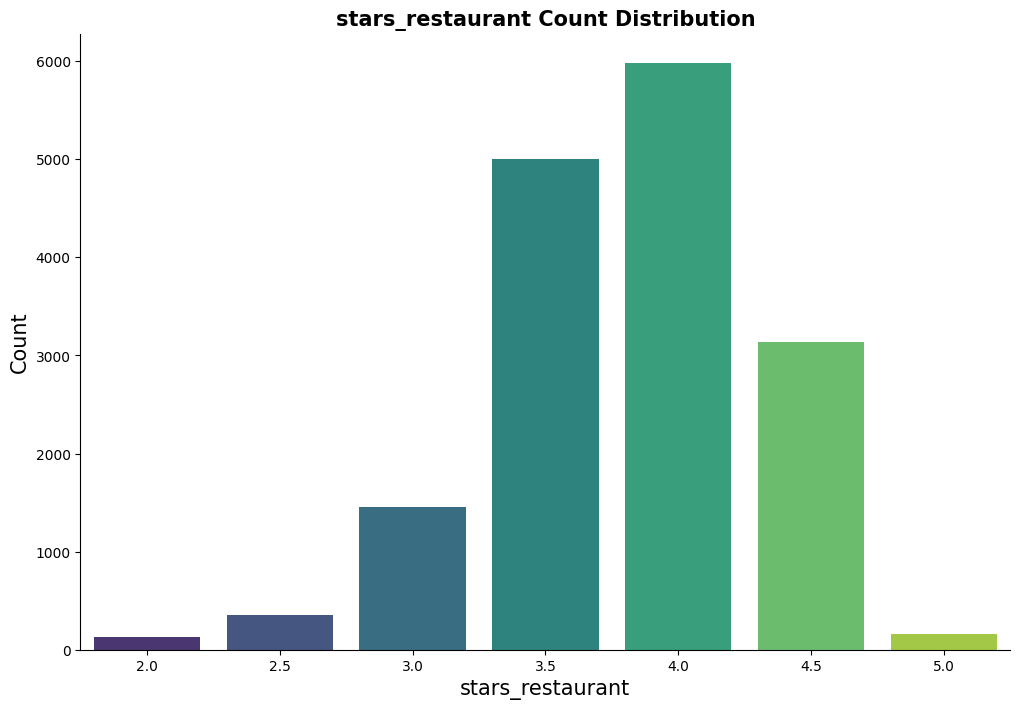

In [ ]:
variable = 'stars_restaurant'

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.countplot(x = f'{variable}', data = df_filtered)
sns.countplot(x=variable, data=df_filtered, palette='viridis', ax=ax)
ax.set_xlabel(f'{variable}', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title(f'{variable} Count Distribution', fontsize=15, weight="bold")
sns.despine()

In [ ]:
variable = 'stars_restaurant'

print(f'Min {variable}: ', df_filtered[f'{variable}'].min())
print(f'Max {variable}: ', df_filtered[f'{variable}'].max())
print(f'Promedio {variable}: ', df_filtered[f'{variable}'].mean().round(2))

Min stars_restaurant:  2.0
Max stars_restaurant:  5.0
Promedio stars_restaurant:  3.81


Las calificaciones por restaurante va desde 1 a 5, pero no hay restaurantes con clasificacion de 1 estrella. El promedio de estrellas entre restaurantes es de 3.81 y se puede ver que la mayoria de restaurantes tienen 3.5, 4 y 4,5 estrellas. Hay pocos restaurantes con 5 estrellas.

<Axes: title={'center': 'Boxplot de stars_restaurant'}, xlabel='stars_restaurant'>

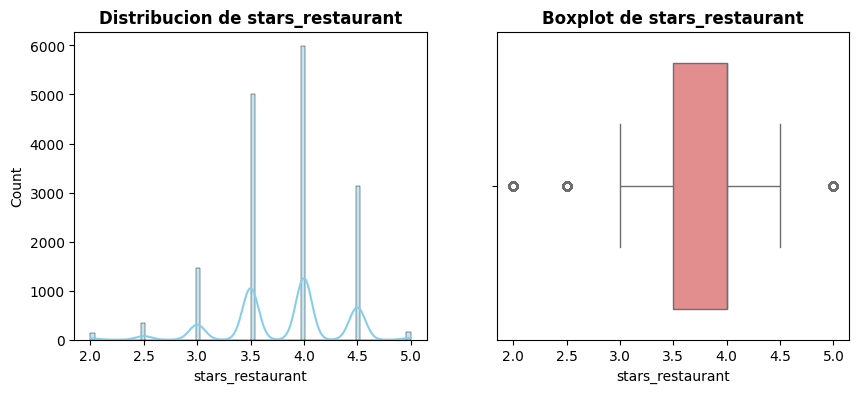

In [ ]:
variable = 'stars_restaurant'

fig, ax = plt.subplots(1,2,figsize = (10,4))
ax[0].set_title(f"Distribucion de {variable}", weight="bold")
sns.histplot(data = df_filtered, x = f"{variable}", kde = True, ax = ax[0], color='skyblue')
ax[1].set_title(f"Boxplot de {variable}", weight="bold")
sns.boxplot(data = df_filtered, x = f"{variable}", ax= ax[1], color='lightcoral')

Los que parecieran ser outliers segun el boxplot claramente no lo son, ya que las estrellas van de 0 a 5, por lo que los datos son correctos y no atipicos.

### **review_count**
El número de reseñas que ha recibido el negocio.

In [ ]:
df_filtered.groupby("name").review_count.sum().sort_values(ascending = False)

name
The Stein & Vine               697344.0
Ford's Garage                  599046.0
Portillo's Hot Dogs            457560.0
Tibby's New Orleans Kitchen    338000.0
Moreno Bakery                  301644.0
                                 ...   
Olde Town Pizzeria              16356.0
Wow! That's Fresh               16272.0
Red Lobster                     15732.0
Campbell's Dairyland            13568.0
Chili's                         13054.0
Name: review_count, Length: 79, dtype: float32

In [ ]:
df_filtered.groupby("name").review_count.sum().sort_values(ascending = False).mean()

NameError: name 'df_filtered' is not defined

Se puede ver que la cantidad de reseñas por restaurante van desde 697.344 reseñas a 13.054. Dado que nosotros cortamos la base de datos, esta cantidad de reseñas no figura en nuestro dataset, es por ello que al ser irrelevante esta variable, optamos por eliminarla.

In [ ]:
df_filtered.drop(columns = ['review_count'], inplace = True)

In [ ]:
df_filtered.name.value_counts()

In [ ]:
df_filtered.name.value_counts().mean()

En nuestro dataset de la ciudad de Brandon, el restaurante que mas reseñas tiene es de 768, y el que menos tiene cuenta con 106. El promedio es de 205 reseñas por negocio.  

### **is_open**
Una variable binaria que indica si el negocio está abierto (1) o cerrado (0).

In [ ]:
df_filtered.is_open.value_counts()

is_open
1.0    15215
0.0      996
Name: count, dtype: int64

Dado que la variable indica si el lugar se encuentra abierto o cerrado pero eso depende del dia y horario, esta variable tampoco resulta relevante, por lo que tambien se opta por eliminarla.

In [ ]:
df_filtered.drop(columns = ['is_open'], inplace = True)

<ipython-input-36-b88132cb5409>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns = ['is_open'], inplace = True)


### **stars_y**
La calificación de estrellas otorgada por el usuario en su reseña.

Renombramos la columna para que el nombre de la variable sea mas acorde a su informacion.

In [ ]:
df_filtered.rename(columns = {"stars_y": "stars_review"}, inplace = True)

<ipython-input-37-4f918641ee87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns = {"stars_y": "stars_review"}, inplace = True)


<ipython-input-38-333ca95e5ef8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df_filtered, palette='viridis', ax=ax)


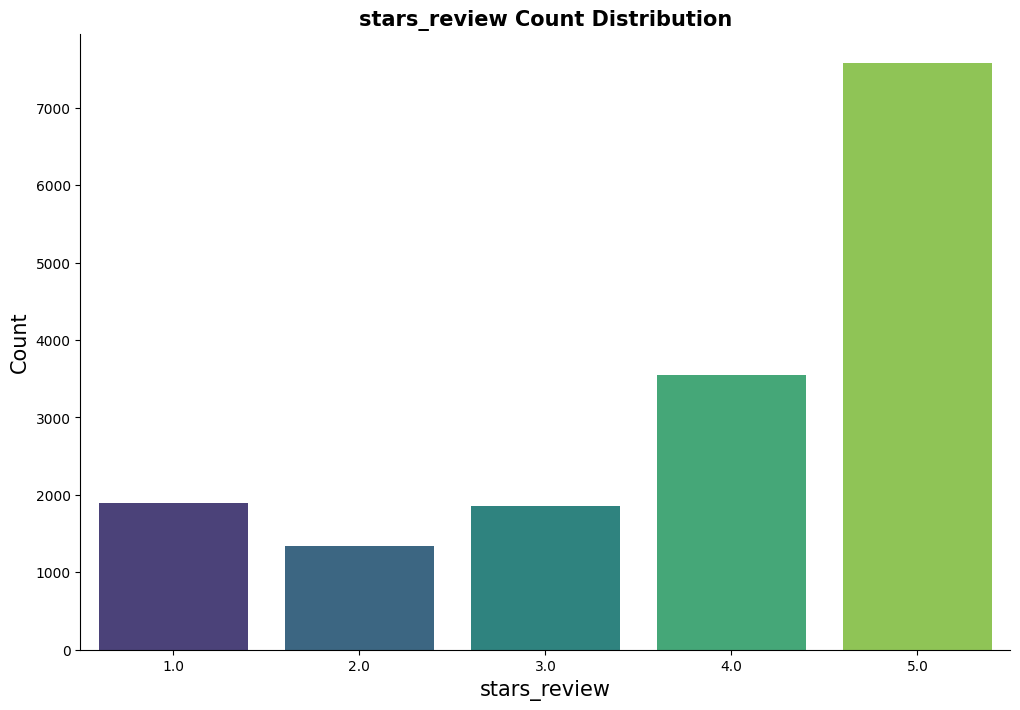

In [ ]:
variable = 'stars_review'

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.countplot(x = f'{variable}', data = df_filtered)
sns.countplot(x=variable, data=df_filtered, palette='viridis', ax=ax)
ax.set_xlabel(f'{variable}', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title(f'{variable} Count Distribution', fontsize=15, weight="bold")
sns.despine()

In [ ]:
variable = 'stars_review'

print(f'Min {variable}: ', df_filtered[f'{variable}'].min())
print(f'Max {variable}: ', df_filtered[f'{variable}'].max())
print(f'Promedio {variable}: ', df_filtered[f'{variable}'].mean().round(2))

Min stars_review:  1.0
Max stars_review:  5.0
Promedio stars_review:  3.84


Las calificaciones por restaurante van desde 1 a 5. El promedio de estrellas es de 3.81. Hay un numero muy alto de reseñas con 5 estrellas.

<Axes: title={'center': 'Boxplot de stars_review'}, xlabel='stars_review'>

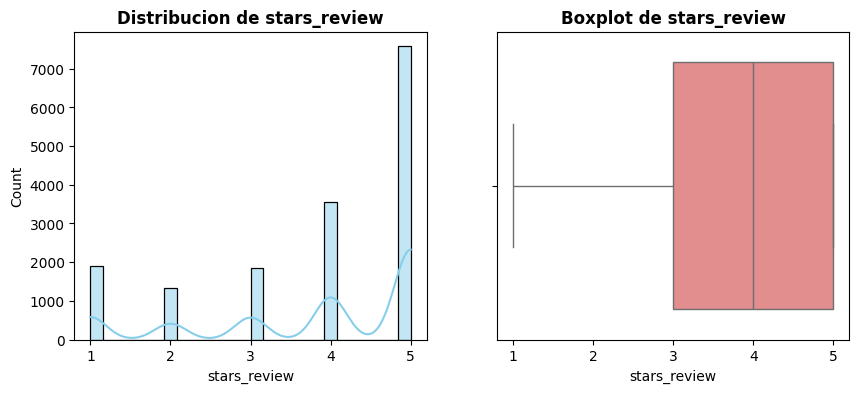

In [ ]:
variable = 'stars_review'

fig, ax = plt.subplots(1,2,figsize = (10,4))
ax[0].set_title(f"Distribucion de {variable}", weight="bold")
sns.histplot(data = df_filtered, x = f"{variable}", kde = True, ax = ax[0], color='skyblue')
ax[1].set_title(f"Boxplot de {variable}", weight="bold")
sns.boxplot(data = df_filtered, x = f"{variable}", ax= ax[1], color='lightcoral')

### **useful**
El número de usuarios que encontraron útil la reseña.

<Axes: title={'center': 'Boxplot de useful'}, xlabel='useful'>

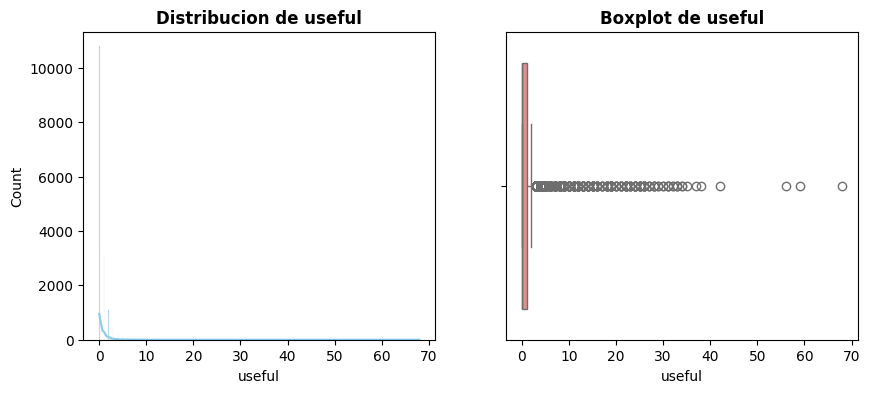

In [ ]:
variable = 'useful'

fig, ax = plt.subplots(1,2,figsize = (10,4))
ax[0].set_title(f"Distribucion de {variable}", weight="bold")
sns.histplot(data = df_filtered, x = f"{variable}", kde = True, ax = ax[0], color='skyblue')
ax[1].set_title(f"Boxplot de {variable}", weight="bold")
sns.boxplot(data = df_filtered, x = f"{variable}", ax= ax[1], color='lightcoral')

In [ ]:
variable = 'useful'

print(f'Min {variable}: ', df_filtered[f'{variable}'].min())
print(f'Max {variable}: ', df_filtered[f'{variable}'].max())
print(f'Promedio {variable}: ', df_filtered[f'{variable}'].mean().round(2))


print('\n1º Quartile: ', df_filtered[f"{variable}"].quantile(q = 0.25))
print('2º Quartile: ', df_filtered[f"{variable}"].quantile(q = 0.50))
print('3º Quartile: ', df_filtered[f"{variable}"].quantile(q = 0.75))
print('4º Quartile: ', df_filtered[f"{variable}"].quantile(q = 1.00))

print(f'\nValores de "{variable}s" mayores a', df[f"{variable}"].quantile(q = 0.75) +
                      1.5 * (df[f"{variable}"].quantile(q = 0.75) - df[f"{variable}"].quantile(q = 0.25)), 'se pueden considerar outliers')

Min useful:  0.0
Max useful:  68.0
Promedio useful:  0.82

1º Quartile:  0.0
2º Quartile:  0.0
3º Quartile:  1.0
4º Quartile:  68.0

Valores de "usefuls" mayores a 2.5 se pueden considerar outliers


In [ ]:
df_filtered[df_filtered.useful == df_filtered.useful.max()]

,business_id,name,address,latitude,longitude,stars_restaurant,categories,hours,review_id,user_id,stars_review,useful,funny,cool,text,date,attributes
2533994,H0TidC6ft9wkTBAhsWrYLQ,Carrabba's Italian Grill,801 Providence Rd,27.925297,-82.314964,3.5,"Restaurants, Seafood, Italian","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""11:0-22:0"", ...",3YooxkMVI_o9Ox_QV95aIg,YTu0c-1I9ECeksIgoHXFPA,2.0,68.0,26.0,51.0,We were meeting up with family for dinner and ...,2019-01-06 18:40:10,"{""BusinessParking"": ""{'garage': False, 'street..."


La reseña que fue encontrada mas util fue votada asi por 59 usuarios.

In [ ]:
df_filtered.groupby("name").useful.sum().sort_values(ascending = False).head(5)

name
The Stein & Vine       561.0
Ford's Garage          550.0
Moreno Bakery          532.0
Portillo's Hot Dogs    523.0
Sushi Maru             334.0
Name: useful, dtype: float32

Los restaurantes que cuentan con mas reseñas utiles son The Stein & Vine,
Ford's Garage, Moreno Bakery y Portillo's Hot Dogs con arriba de los 500 puntos de useful totales en las reseñas de los mismos.

### **funny**
El número de usuarios que encontraron divertida la reseña.

<Axes: title={'center': 'Boxplot de funny'}, xlabel='funny'>

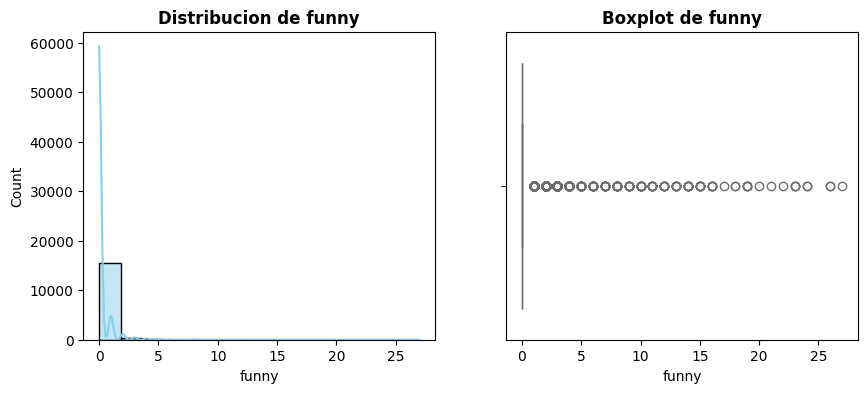

In [ ]:
variable = 'funny'

fig, ax = plt.subplots(1,2,figsize = (10,4))
ax[0].set_title(f"Distribucion de {variable}", weight="bold")
sns.histplot(data = df_filtered, x = f"{variable}", kde = True, ax = ax[0], color='skyblue')
ax[1].set_title(f"Boxplot de {variable}", weight="bold")
sns.boxplot(data = df_filtered, x = f"{variable}", ax= ax[1], color='lightcoral')

In [ ]:
variable = 'funny'

print(f'Min {variable}: ', df_filtered[f'{variable}'].min())
print(f'Max {variable}: ', df_filtered[f'{variable}'].max())
print(f'Promedio {variable}: ', df_filtered[f'{variable}'].mean().round(2))


print('\n1º Quartile: ', df_filtered[f"{variable}"].quantile(q = 0.25))
print('2º Quartile: ', df_filtered[f"{variable}"].quantile(q = 0.50))
print('3º Quartile: ', df_filtered[f"{variable}"].quantile(q = 0.75))
print('4º Quartile: ', df_filtered[f"{variable}"].quantile(q = 1.00))

print(f'\nValores de "{variable}s" mayores a', df[f"{variable}"].quantile(q = 0.75) +
                      1.5 * (df[f"{variable}"].quantile(q = 0.75) - df[f"{variable}"].quantile(q = 0.25)), 'se pueden considerar outliers')

Min funny:  0.0
Max funny:  27.0
Promedio funny:  0.24

1º Quartile:  0.0
2º Quartile:  0.0
3º Quartile:  0.0
4º Quartile:  27.0

Valores de "funnys" mayores a 0.0 se pueden considerar outliers


In [ ]:
df_filtered[df_filtered.funny == df_filtered.funny.max()]

,business_id,name,address,latitude,longitude,stars_restaurant,categories,hours,review_id,user_id,stars_review,useful,funny,cool,text,date,attributes
3351772,UTXwFoe-KOo0SqnBqtbyhQ,Shells Seafood Restaurant - Brandon,115 E Brandon Blvd,27.936899,-82.28476,4.5,"Restaurants, Seafood","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""16:0-21:0"", ...",5RJ7odwGyd6eCm-G9Ar_5w,nAPU1-75Gqg71NGr_HosFA,3.0,33.0,27.0,32.0,"Shells is a Florida seafood restaurant, locate...",2017-04-14 18:35:11,"{""RestaurantsGoodForGroups"": ""True"", ""Restaura..."


Esta fue la reseña votada como mas graciosa, que da la coincidencia que es la misma que fue clasificada como la mas util.

In [ ]:
df_filtered.groupby("name").funny.sum().sort_values(ascending = False).head(5)

name
Portillo's Hot Dogs    217.0
The Stein & Vine       211.0
Moreno Bakery          166.0
Ford's Garage          123.0
Pho Viet Restaurant    103.0
Name: funny, dtype: float32

Los restaurantes que cuentan con mas reseñas graciosas son Portillo's Hot Dogs, The Stein & Vine, Moreno Bakery y Ford's Garage con arriba de los 100 puntos de funny totales en las reseñas de los mismos.

De igual manera, para nuestro analisis no resulta relevante saber que tan graciosa fue la reseña por lo que optamos por eliminarla.

In [ ]:
df_filtered.drop(columns = ['funny'], inplace = True)

<ipython-input-49-851464fe4672>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns = ['funny'], inplace = True)


### **cool**
El número de usuarios que encontraron genial la reseña.

<Axes: title={'center': 'Boxplot de cool'}, xlabel='cool'>

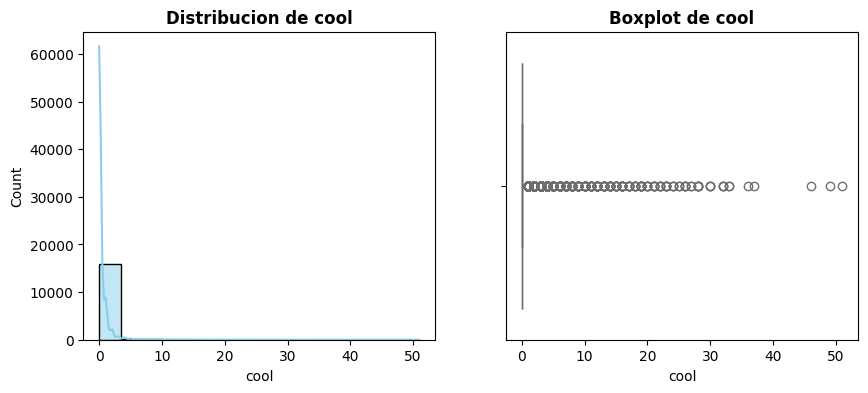

In [ ]:
variable = 'cool'

fig, ax = plt.subplots(1,2,figsize = (10,4))
ax[0].set_title(f"Distribucion de {variable}", weight="bold")
sns.histplot(data = df_filtered, x = f"{variable}", kde = True, ax = ax[0], color='skyblue')
ax[1].set_title(f"Boxplot de {variable}", weight="bold")
sns.boxplot(data = df_filtered, x = f"{variable}", ax= ax[1], color='lightcoral')

In [ ]:
variable = 'cool'

print(f'Min {variable}: ', df_filtered[f'{variable}'].min())
print(f'Max {variable}: ', df_filtered[f'{variable}'].max())
print(f'Promedio {variable}: ', df_filtered[f'{variable}'].mean().round(2))

print('\n1º Quartile: ', df_filtered[f"{variable}"].quantile(q = 0.25))
print('2º Quartile: ', df_filtered[f"{variable}"].quantile(q = 0.50))
print('3º Quartile: ', df_filtered[f"{variable}"].quantile(q = 0.75))
print('4º Quartile: ', df_filtered[f"{variable}"].quantile(q = 1.00))

print(f'\nValores de "{variable}s" mayores a', df[f"{variable}"].quantile(q = 0.75) +
                      1.5 * (df[f"{variable}"].quantile(q = 0.75) - df[f"{variable}"].quantile(q = 0.25)), 'se pueden considerar outliers')

Min cool:  0.0
Max cool:  51.0
Promedio cool:  0.46

1º Quartile:  0.0
2º Quartile:  0.0
3º Quartile:  0.0
4º Quartile:  51.0

Valores de "cools" mayores a 0.0 se pueden considerar outliers


In [ ]:
df_filtered[df_filtered.cool == df_filtered.cool.max()]

,business_id,name,address,latitude,longitude,stars_restaurant,categories,hours,review_id,user_id,stars_review,useful,cool,text,date,attributes
2533994,H0TidC6ft9wkTBAhsWrYLQ,Carrabba's Italian Grill,801 Providence Rd,27.925297,-82.314964,3.5,"Restaurants, Seafood, Italian","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""11:0-22:0"", ...",3YooxkMVI_o9Ox_QV95aIg,YTu0c-1I9ECeksIgoHXFPA,2.0,68.0,51.0,We were meeting up with family for dinner and ...,2019-01-06 18:40:10,"{""BusinessParking"": ""{'garage': False, 'street..."


De igual manera, para nuestro analisis no resulta relevante saber que tan cool fue la reseña por lo que optamos por eliminarla al igual que funny.

In [ ]:
df_filtered.drop(columns = ['cool'], inplace = True)

<ipython-input-53-4c3be3c59eff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns = ['cool'], inplace = True)


### **reviw_id**

In [ ]:
df_filtered.review_id.nunique()

16211

### **name**
El nombre del negocio.

In [ ]:
df_filtered.name.value_counts()

name
The Stein & Vine               768
Ford's Garage                  714
Portillo's Hot Dogs            615
Tibby's New Orleans Kitchen    520
Moreno Bakery                  513
                              ... 
Olde Town Pizzeria             116
Red Lobster                    114
Wow! That's Fresh              113
Chili's                        107
Campbell's Dairyland           106
Name: count, Length: 79, dtype: int64

Como se menciono anteriormente en el analisis de la variable `review_count`, en nuestro dataset de la ciudad de Brandon, el restaurante que mas reseñas tiene es de 768, y el que menos tiene cuenta con 106. El promedio es de 205 reseñas por negocio.  

In [ ]:
df_filtered.name.nunique()

79

### **categories**

Como la variable se encuentra en diccionarios, vamos a separar las categorias en columnas para poder utilizarlas.

In [ ]:
categories_count = df_filtered['categories'].str.split(',').explode().str.strip().value_counts()
categories_count

categories
Restaurants                  16211
Food                          5077
Nightlife                     4778
Bars                          4778
Burgers                       3520
                             ...  
Mediterranean                  118
Greek                          118
Irish                          117
Coffee & Tea                   106
Ice Cream & Frozen Yogurt      106
Name: count, Length: 77, dtype: int64

Eliminaremos la categorias 'Restaurants' ya que es un valor que se repite en casi todas las filas, y además el dataset de por si es sobre restaurantes. Lo mismo sucede con la categoria 'Food'.Es una categoria que no nos aporta información.

In [ ]:
# Eliminar categorías no importantes
categories_to_remove = ['Restaurants', 'American (New)', 'American (Traditional)', 'Food', 'Bars' ]

categories_count = categories_count.drop(categories_to_remove)
# Crear una lista ordenada de categorías
ordered_cat_list = categories_count.index.tolist()

def ordenar_genero(categories):
    if isinstance(categories, str):
        split_cat = [g.strip() for g in categories.split(',') if g not in categories_to_remove]
        sorted_cat = sorted(split_cat, key=lambda g: ordered_cat_list.index(g) if g in ordered_cat_list else len(ordered_cat_list))
        return ', '.join(sorted_cat)
    return ''

# Crear la nueva columna con las categorías filtradas y ordenadas
df_filtered['sorted_categories'] = df_filtered['categories'].apply(ordenar_genero)

# Separar las categorías ordenadas en columnas individuales
# Use df_filtered instead of df here
split_categories = df_filtered['sorted_categories'].str.split(', ', expand=True)
df_filtered['cat_1'] = split_categories[0]
df_filtered['cat_2'] = split_categories[1]
df_filtered['cat_3'] = split_categories[2]
df_filtered['cat_4'] = split_categories[3]

<ipython-input-58-6df6bf439355>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sorted_categories'] = df_filtered['categories'].apply(ordenar_genero)
<ipython-input-58-6df6bf439355>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cat_1'] = split_categories[0]
<ipython-input-58-6df6bf439355>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
df_filtered

,business_id,name,address,latitude,longitude,stars_restaurant,categories,hours,review_id,user_id,stars_review,useful,text,date,attributes,sorted_categories,cat_1,cat_2,cat_3,cat_4
307,ZpXZgnBrNodHH8pKpOK_Kg,Jesse's Steak and Seafood,524 W Brandon Blvd,27.938135,-82.292076,4.0,"Sandwiches, Steakhouses, Restaurants, Seafood","{""Monday"": ""11:0-21:0"", ""Tuesday"": ""11:0-21:0""...",fFX81fVi2KpnlR7CN7ht_A,Tf9sX1pSq5auLh3CAT9TaQ,4.0,1.0,My boyfriend and I both decided to try Jesse's...,2018-04-15 13:21:32,"{""Alcohol"": ""u'full_bar'"", ""RestaurantsGoodFor...","Seafood, Sandwiches, Steakhouses, Restaurants",Seafood,Sandwiches,Steakhouses,Restaurants
580,ew_Hhp12Silh3qjoPaW9IA,Thai Legacy Restaurant,120 N Parsons Ave,27.938719,-82.286095,4.5,"Food, Thai, Restaurants, Desserts, Vegan","{""Wednesday"": ""11:0-20:0"", ""Thursday"": ""11:0-2...",09hEaV-z00xdrGThgQXUdg,jqEBRwNaBNK4dZhCjZx2tQ,5.0,0.0,"So much care is given to healthy, delicious fo...",2018-09-25 11:13:48,"{""RestaurantsDelivery"": ""False"", ""Caters"": ""Tr...","Desserts, Thai, Vegan, Restaurants",Desserts,Thai,Vegan,Restaurants
692,U0ICWpbd1C0GD9SpIv3bSA,Outback Steakhouse,"2020 Brandon Blvd, Ste 190",27.938475,-82.318344,3.5,"Restaurants, Steakhouses","{""Monday"": ""11:0-22:0"", ""Tuesday"": ""11:0-22:0""...",jpThMSnG2zJrhmSnn_PADQ,x5DJdEvWFh1cKBkPO9jNsw,4.0,0.0,"I came in for lunch, my group totaled eight hu...",2011-11-30 06:52:11,"{""GoodForKids"": ""True"", ""RestaurantsTakeOut"": ...",Steakhouses,Steakhouses,None,None,None
718,NwJoFxmYRDxVGXgPtrjQ3w,Ploy Thai,1941 W Brandon Blvd,27.936798,-82.316132,4.0,"Thai, Sushi Bars, Restaurants","{""Monday"": ""17:0-21:0"", ""Tuesday"": ""17:0-21:0""...",MtRjGfagShXjUWWT8wNcUw,to2os_TcWhGmtPmOGITXIg,5.0,0.0,Wow. I have to say incredible. We've driven ...,2013-08-03 15:17:23,"{""BusinessAcceptsCreditCards"": ""True"", ""Restau...","Sushi Bars, Thai, Restaurants",Sushi Bars,Thai,Restaurants,None
759,NwJoFxmYRDxVGXgPtrjQ3w,Ploy Thai,1941 W Brandon Blvd,27.936798,-82.316132,4.0,"Thai, Sushi Bars, Restaurants","{""Monday"": ""17:0-21:0"", ""Tuesday"": ""17:0-21:0""...",Lun9ta1qn_pmuD1VqxiYmg,9gSuVhKyOx3Qn4oI6EQMaA,4.0,0.0,Went there for lunch and was pleasantly surpri...,2009-10-14 21:16:08,"{""BusinessAcceptsCreditCards"": ""True"", ""Restau...","Sushi Bars, Thai, Restaurants",Sushi Bars,Thai,Restaurants,None


In [ ]:
df_filtered.isnull().sum()

business_id             0
name                    0
address                 0
latitude                0
longitude               0
stars_restaurant        0
categories              0
hours                   0
review_id               0
user_id                 0
stars_review            0
useful                  0
text                    0
date                    0
attributes              0
sorted_categories       0
cat_1                   0
cat_2                1799
cat_3                2744
cat_4                4362
dtype: int64

In [ ]:
df_filtered.dropna(inplace = True)

<ipython-input-154-d7e785c6efd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace = True)


In [ ]:
df_filtered.nunique()

business_id             54
name                    54
address                 52
latitude                54
longitude               54
stars_restaurant         6
categories              54
hours                   49
review_id            11849
user_id               7820
stars_review             5
useful                  37
text                 11820
date                 11848
attributes              54
sorted_categories       54
cat_1                   15
cat_2                   27
cat_3                   38
cat_4                   21
dtype: int64

<ipython-input-156-8a8675e306d7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df_filtered, palette='hls', ax=ax, order = order)
<ipython-input-156-8a8675e306d7>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


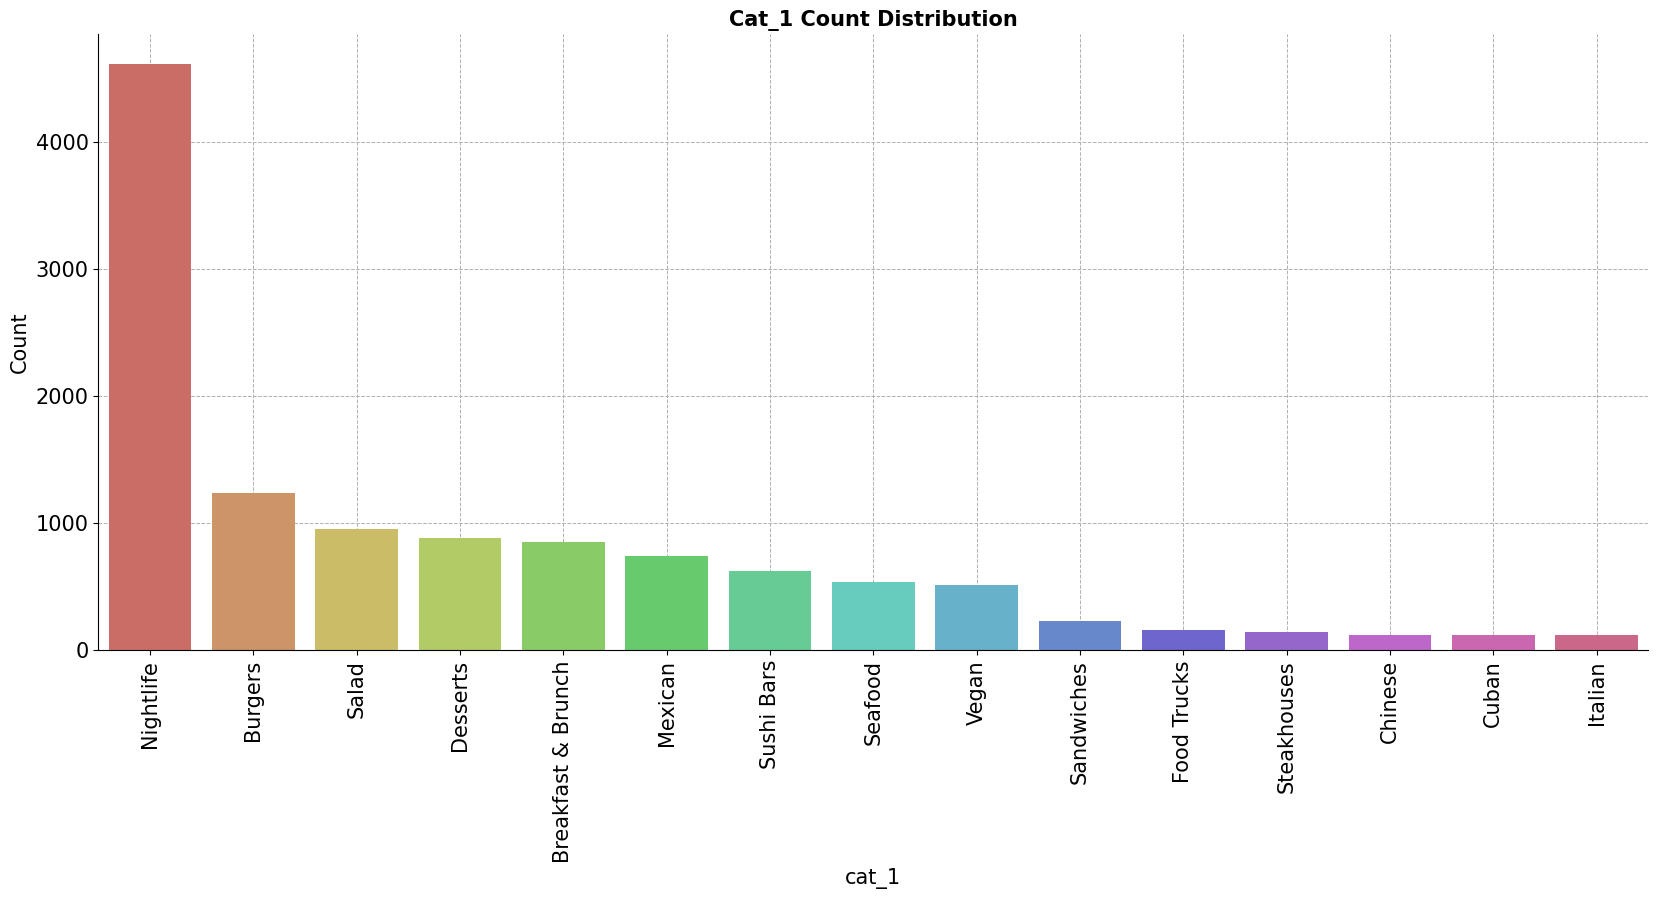

In [ ]:
variable = 'cat_1'

order = df_filtered[variable].value_counts().index

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)

# Graficar el countplot
sns.countplot(x=variable, data=df_filtered, palette='hls', ax=ax, order = order)

ax.grid(True, which='both', linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

ax.set_xlabel(f"{variable}", fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title(f'{variable.capitalize()} Count Distribution', fontsize=15, weight="bold")
ax.tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

sns.despine()
plt.show()

<ipython-input-157-c07bc4ea7506>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df_filtered, palette='hls', ax=ax, order = order)
<ipython-input-157-c07bc4ea7506>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


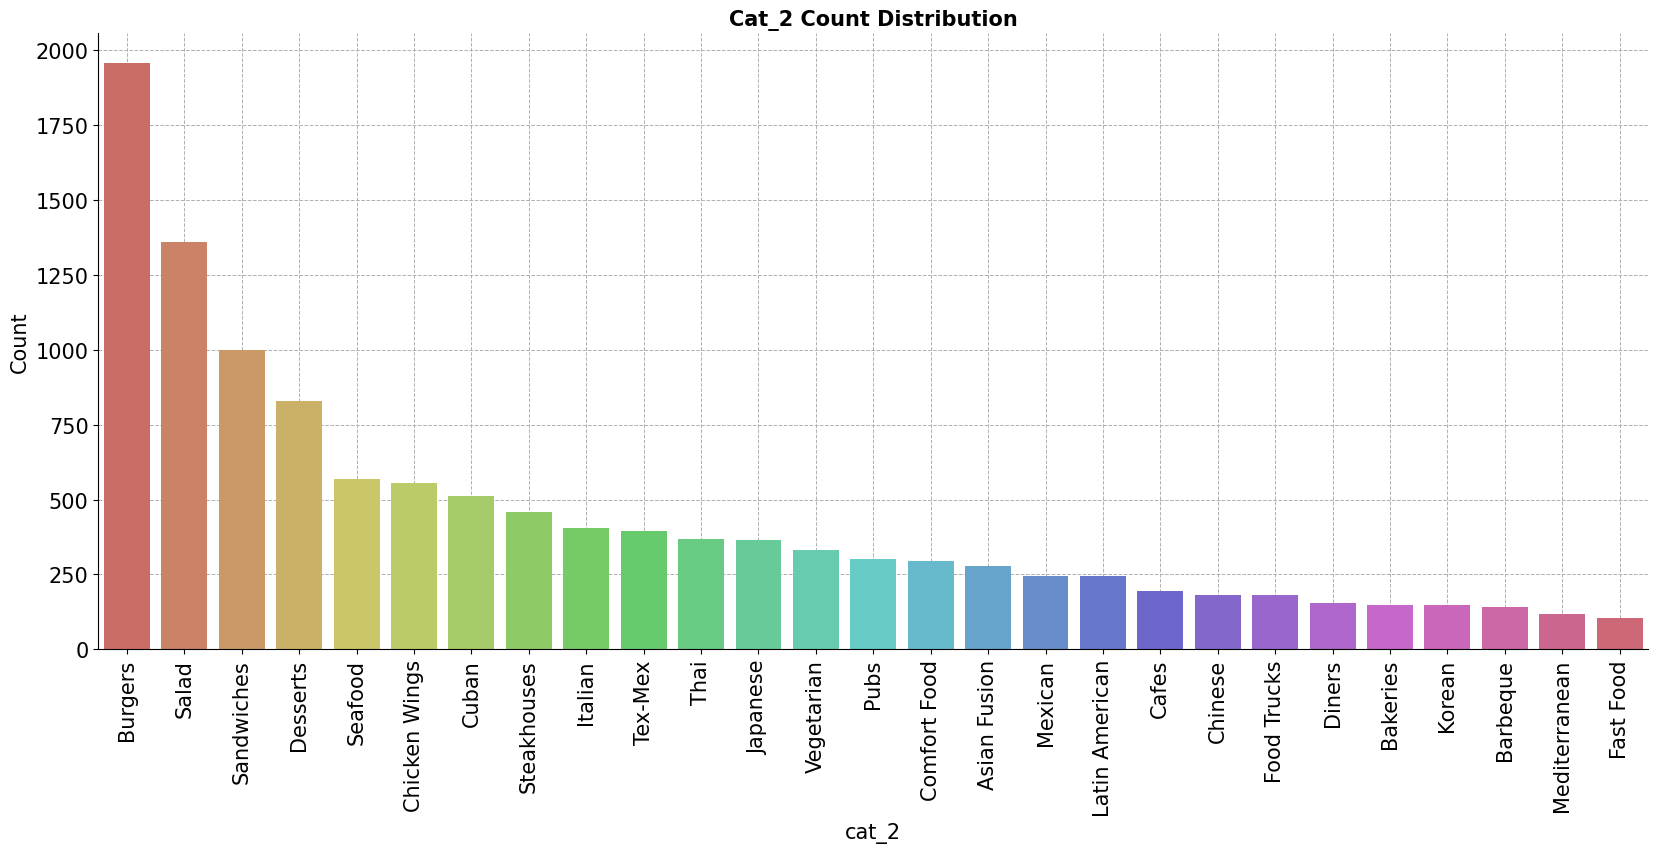

In [ ]:
variable = 'cat_2'

order = df_filtered[variable].value_counts().index

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)

# Graficar el countplot
sns.countplot(x=variable, data=df_filtered, palette='hls', ax=ax, order = order)

ax.grid(True, which='both', linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

ax.set_xlabel(f"{variable}", fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title(f'{variable.capitalize()} Count Distribution', fontsize=15, weight="bold")
ax.tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

sns.despine()
plt.show()

<ipython-input-158-bad334850443>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df_filtered, palette='hls', ax=ax, order = order)
<ipython-input-158-bad334850443>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


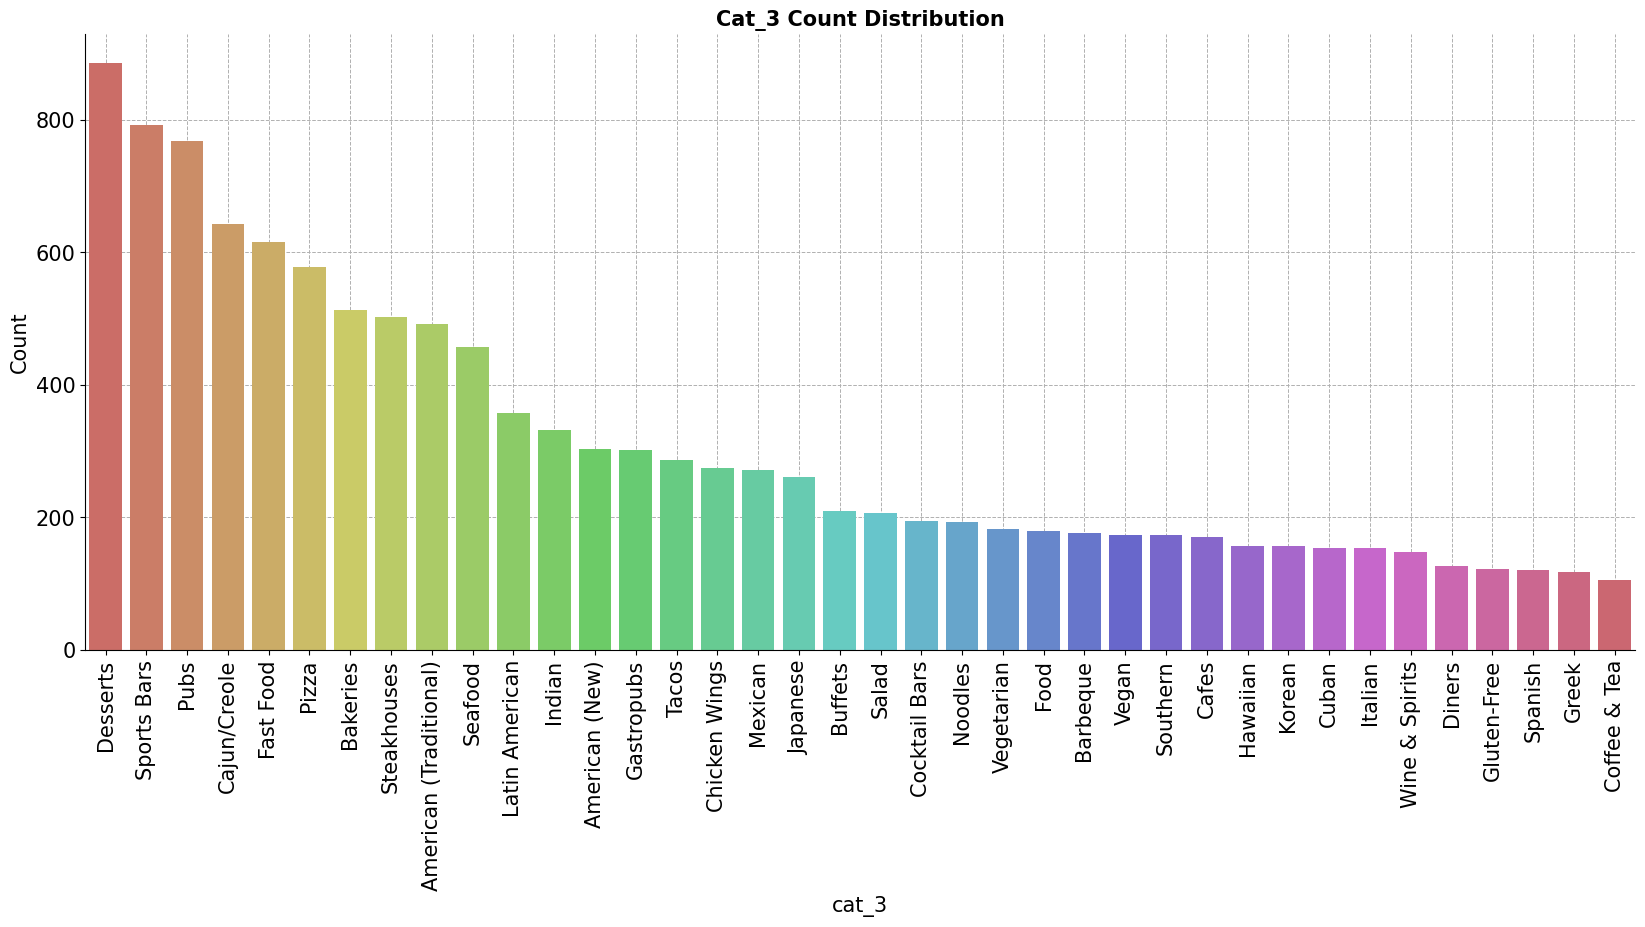

In [ ]:
variable = 'cat_3'

order = df_filtered[variable].value_counts().index

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)

# Graficar el countplot
sns.countplot(x=variable, data=df_filtered, palette='hls', ax=ax, order = order)

ax.grid(True, which='both', linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

ax.set_xlabel(f"{variable}", fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title(f'{variable.capitalize()} Count Distribution', fontsize=15, weight="bold")
ax.tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

sns.despine()
plt.show()

<ipython-input-159-e9c87193e7e5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df_filtered, palette='hls', ax=ax, order = order)
<ipython-input-159-e9c87193e7e5>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


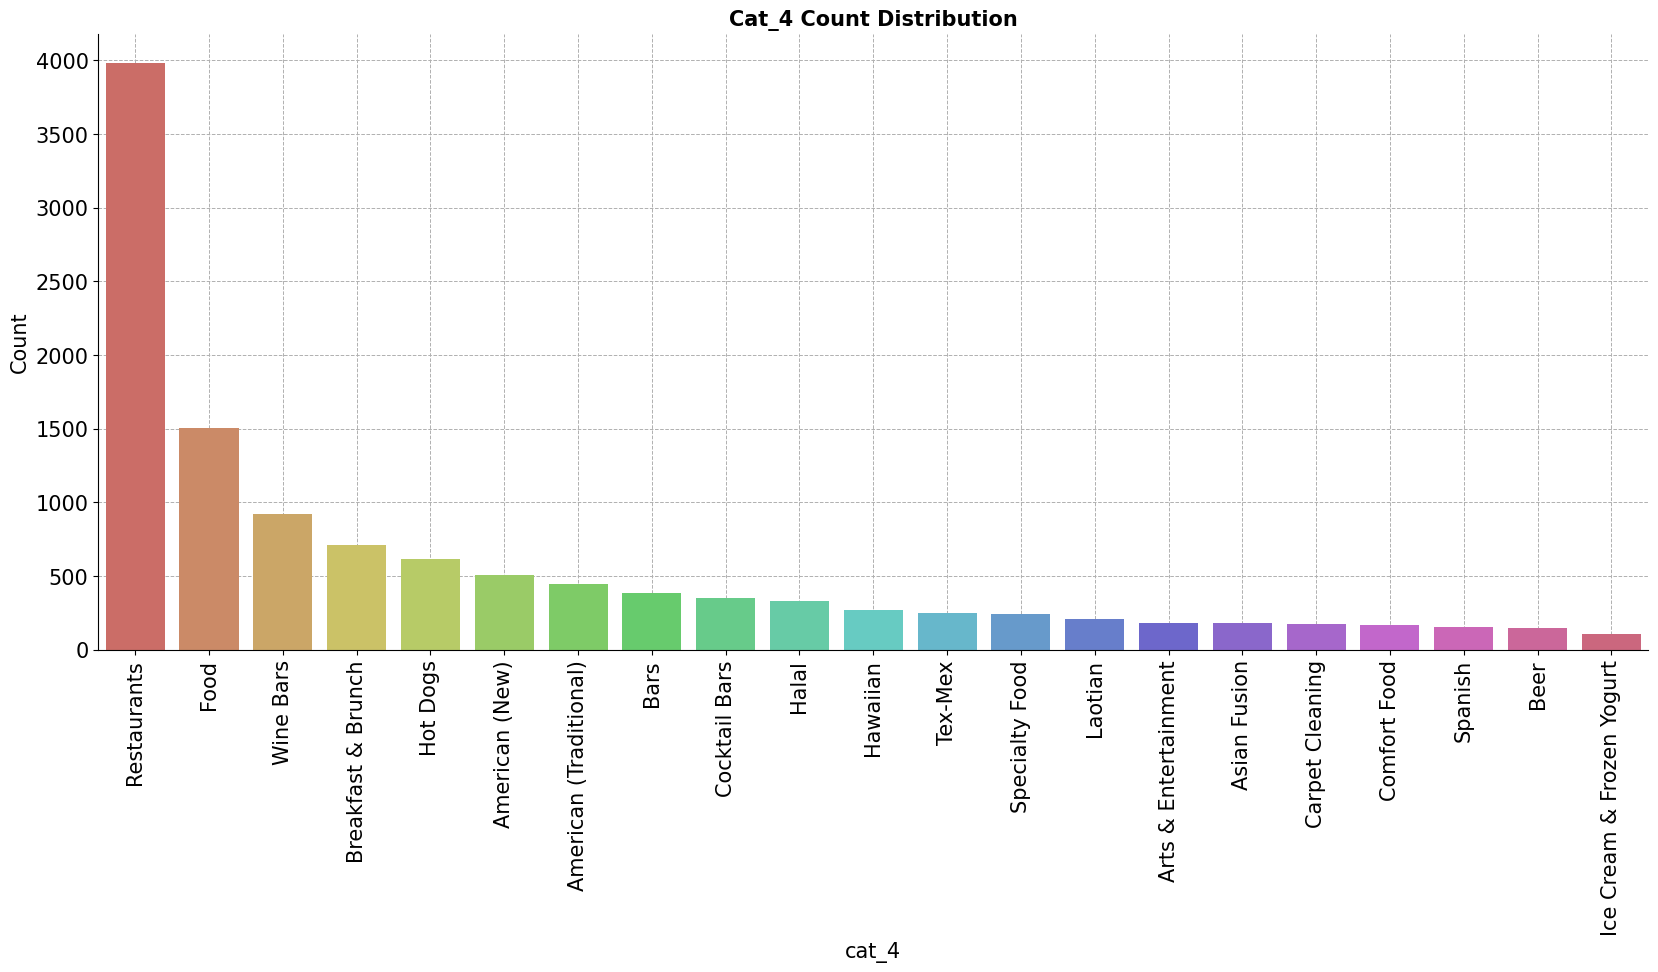

In [ ]:
variable = 'cat_4'

order = df_filtered[variable].value_counts().index

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)

# Graficar el countplot
sns.countplot(x=variable, data=df_filtered, palette='hls', ax=ax, order = order)

ax.grid(True, which='both', linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

ax.set_xlabel(f"{variable}", fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title(f'{variable.capitalize()} Count Distribution', fontsize=15, weight="bold")
ax.tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

sns.despine()
plt.show()

### **hours**
El horario de funcionamiento del negocio.

In [ ]:
df_filtered['hours']

307        {"Monday": "11:0-21:0", "Tuesday": "11:0-21:0"...
580        {"Wednesday": "11:0-20:0", "Thursday": "11:0-2...
838        {"Monday": "11:0-21:0", "Tuesday": "11:0-21:0"...
886        {"Monday": "11:0-22:0", "Tuesday": "11:0-22:0"...
1129       {"Monday": "0:0-0:0", "Tuesday": "11:0-21:0", ...
                                 ...                        
3776198    {"Monday": "17:0-22:0", "Tuesday": "8:30-9:0",...
3776251    {"Monday": "0:0-0:0", "Tuesday": "11:0-22:0", ...
3776784    {"Monday": "0:0-0:0", "Tuesday": "11:0-22:0", ...
3777344    {"Monday": "0:0-0:0", "Tuesday": "11:0-22:0", ...
3778199    {"Monday": "17:0-22:0", "Tuesday": "8:30-9:0",...
Name: hours, Length: 11849, dtype: object

### **date**
La fecha en que se publicó la reseña.

In [ ]:
df_filtered.date

307        2018-04-15 13:21:32
580        2018-09-25 11:13:48
838        2015-03-19 00:13:44
886        2013-03-18 18:06:31
1129       2013-08-04 00:33:42
                  ...         
3776198    2021-08-18 00:31:05
3776251    2011-09-29 15:29:47
3776784    2022-01-15 00:56:10
3777344    2016-12-09 17:20:25
3778199    2021-09-18 18:54:21
Name: date, Length: 11849, dtype: object

<ipython-input-162-1fe13cba02ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = pd.to_datetime(df_filtered['date']).dt.year


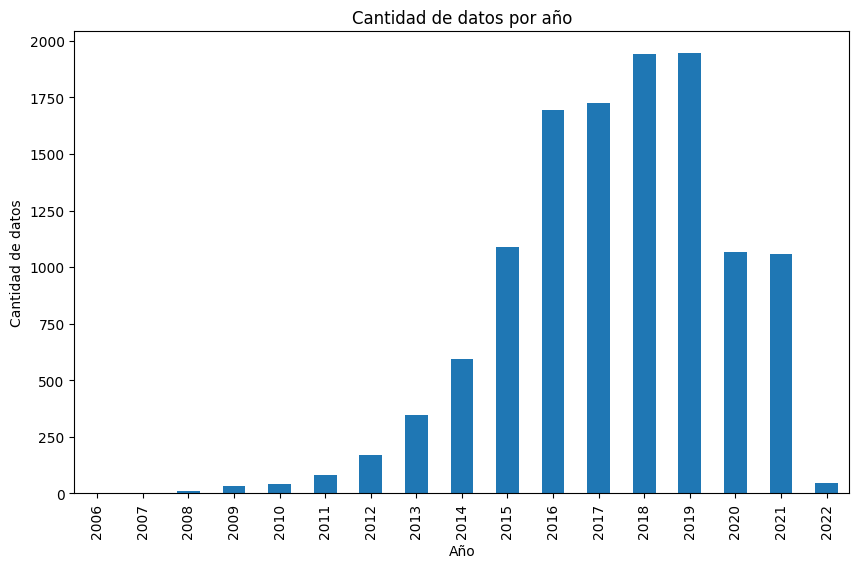

<ipython-input-162-1fe13cba02ba>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['year'], inplace=True)


In [ ]:
# Crear una nueva columna temporal con solo los años
df_filtered['year'] = pd.to_datetime(df_filtered['date']).dt.year

# Contar la cantidad de datos por año
data_per_year = df_filtered['year'].value_counts().sort_index()

# Graficar los resultados
plt.figure(figsize=(10, 6))
data_per_year.plot(kind='bar')
plt.title('Cantidad de datos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de datos')
plt.show()

# Eliminar la columna temporal 'year'
df_filtered.drop(columns=['year'], inplace=True)

Las reseñas van desde el 2006 al 2022. Se puede ver que el numero de reseñas crece considerablemente para el año 2014, hasta el pico en 2018/2019, pero vuelven a caer en 2020.

In [ ]:
print(f'Min count: {data_per_year.min()} (Year: {data_per_year.idxmin()})')
print(f'Max count: {data_per_year.max()} (Year: {data_per_year.idxmax()})')
print(f'Average count: {data_per_year.mean().round(2)}')

Min count: 1 (Year: 2006)
Max count: 1944 (Year: 2019)
Average count: 697.0


El año que mas reseñas tiene es el 2019, y el que menos tiene es 2006 y el promedio de reseñas por año es de 697.

Como saber el año de la reseña no resulta relevante para el sistema de recomendacion, tambien optamos por eliminarla.

In [ ]:
df_filtered.drop(columns = ['date'], inplace = True)

<ipython-input-164-5d515fe6d588>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns = ['date'], inplace = True)


### **attributes**
Una colección de atributos sobre el negocio, como 'Acepta tarjetas de crédito', 'Estacionamiento', 'Wi-Fi', etc.

# Preprocesamiento II de los datos:
- tokenizacion
- limpieza: eliminacion de mayusculas y caracteres alfanumericos
- homogenizacion: lematizacion

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/TP Final IA/df_original.csv' # Add a filename to the path

# Exportar el DataFrame a un archivo CSV en Google Drive
df_filtered.to_csv(file_path, index=False)

print(f'Archivo guardado en: {file_path}')

Archivo guardado en: /content/drive/MyDrive/TP Final IA/df_original.csv


# **Modelo**

In [ ]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import string

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Analisis de frecuencia sin stop words

In [ ]:
# Cargar módulos y datos
lemmatizer = WordNetLemmatizer()
stopwords_en = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation

def normalize(text):
    # Tokenizamos
    text_tokens = nltk.wordpunct_tokenize(text)

    # Pasamos a minúsculas y alfanumérico
    text_lower_alpha = [token.lower() for token in text_tokens if token.isalnum()]

    # Eliminamos tokens que contengan números
    text_no_numbers = [token for token in text_lower_alpha if not any(char.isdigit() for char in token)]

    # Eliminamos stop-words
    text_clean = [token for token in text_no_numbers if token not in stopwords_en]

    # Lematizamos
    normalized_text = [lemmatizer.lemmatize(word) for word in text_clean]

    return normalized_text

In [ ]:
text_to_analyze = df_filtered.text
text_to_analyze

307        My boyfriend and I both decided to try Jesse's...
580        So much care is given to healthy, delicious fo...
838        This place should be on Restaurant Impossible....
886        Had the Mexican Roll and Philadelphia Roll for...
1129       My hubbie likes to think of himself as a pizza...
                                 ...                        
3776198    This place is a hidden gem!!!!! I was craving ...
3776251    BANG BANG SHRIMP IS BANGIN! ... especially for...
3776784    As always the food is fabulous at this restaur...
3777344    Sunday brunch with endless bubbles. That's wha...
3778199    Food is delicious and not too spicy. Service i...
Name: text, Length: 11849, dtype: object

Normalizaremos el texto con la funcion normalize para luego hacer en análisis de las frecuencias

In [ ]:
df_filtered['normalized_text'] = df_filtered['text'].apply(normalize)

<ipython-input-170-fd79e7fab376>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['normalized_text'] = df_filtered['text'].apply(normalize)


In [ ]:
df_filtered.normalized_text

307        [boyfriend, decided, try, jesse, first, time, ...
580        [much, care, given, healthy, delicious, food, ...
838        [place, restaurant, impossible, run, decor, ta...
886        [mexican, roll, philadelphia, roll, take, disa...
1129       [hubbie, like, think, pizza, connoisseur, serv...
                                 ...                        
3776198    [place, hidden, gem, craving, indian, cuisine,...
3776251    [bang, bang, shrimp, bangin, especially, wedne...
3776784    [always, food, fabulous, restaurant, like, fis...
3777344    [sunday, brunch, endless, bubble, ordered, pas...
3778199    [food, delicious, spicy, service, fast, thorou...
Name: normalized_text, Length: 11849, dtype: object

In [ ]:
tokens_corpus = [token for row in df_filtered.normalized_text for token in row]
counts  = nltk.FreqDist(tokens_corpus)
counts

FreqDist({'food': 9838, 'good': 6994, 'place': 6079, 'great': 5606, 'time': 4981, 'service': 4449, 'like': 3719, 'back': 3715, 'one': 3306, 'go': 3234, ...})

In [ ]:
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print("El corpus tiene %i palabras únicas y un total de %i palabras con una diversidad léxica de %0.3f" % (vocab, words, lexdiv))

El corpus tiene 16023 palabras únicas y un total de 546552 palabras con una diversidad léxica de 34.110


In [ ]:
counts.most_common(20)

[('food', 9838),
 ('good', 6994),
 ('place', 6079),
 ('great', 5606),
 ('time', 4981),
 ('service', 4449),
 ('like', 3719),
 ('back', 3715),
 ('one', 3306),
 ('go', 3234),
 ('get', 3219),
 ('order', 3109),
 ('ordered', 3066),
 ('burger', 3012),
 ('restaurant', 2930),
 ('would', 2733),
 ('u', 2458),
 ('really', 2444),
 ('got', 2425),
 ('also', 2281)]

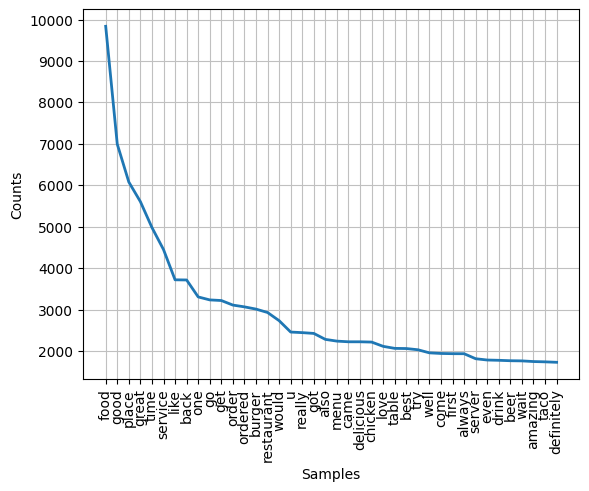

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
counts.plot(40, cumulative=False)

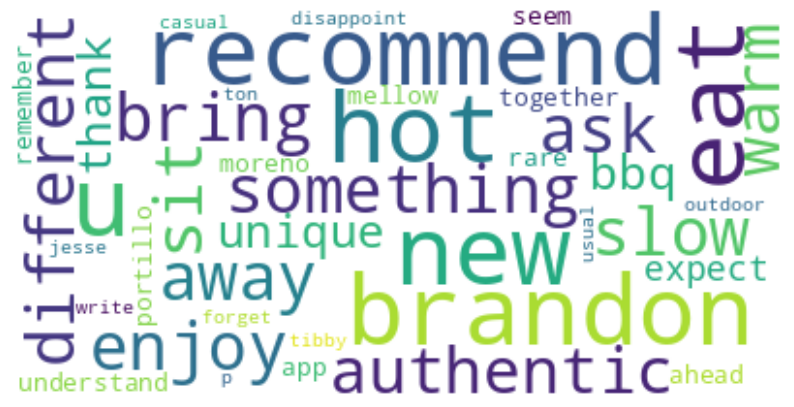

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=40, background_color="white").generate(' '.join(counts))

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Creamos una nueva columna en la que consideraremos a las reviews con puntaje de 4 o 5 como reviews positivas, las que tienen 1 o 2 como negativas, y aquellas que tienen 3 puntos como neutras. Estas ultimas no resultan utiles para el modelo porque no son ni positivas ni negativas, por lo que no las tendremos en cuenta.

In [ ]:
def score_target(score):
    if score == 5 or score == 4:
        return 1
    elif score == 2 or score == 1:
        return 0
    else:
        return None

df_filtered['Positive'] = df_filtered['stars_review'].apply(score_target)

df_filtered = df_filtered.dropna(subset=['Positive']).reset_index(drop=True)

df_filtered

<ipython-input-177-79a43b1c7a07>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Positive'] = df_filtered['stars_review'].apply(score_target)


,business_id,name,address,latitude,longitude,stars_restaurant,categories,hours,review_id,user_id,...,useful,text,attributes,sorted_categories,cat_1,cat_2,cat_3,cat_4,normalized_text,Positive
0,ZpXZgnBrNodHH8pKpOK_Kg,Jesse's Steak and Seafood,524 W Brandon Blvd,27.938135,-82.292076,4.0,"Sandwiches, Steakhouses, Restaurants, Seafood","{""Monday"": ""11:0-21:0"", ""Tuesday"": ""11:0-21:0""...",fFX81fVi2KpnlR7CN7ht_A,Tf9sX1pSq5auLh3CAT9TaQ,...,1.0,My boyfriend and I both decided to try Jesse's...,"{""Alcohol"": ""u'full_bar'"", ""RestaurantsGoodFor...","Seafood, Sandwiches, Steakhouses, Restaurants",Seafood,Sandwiches,Steakhouses,Restaurants,"[boyfriend, decided, try, jesse, first, time, ...",1.0
1,ew_Hhp12Silh3qjoPaW9IA,Thai Legacy Restaurant,120 N Parsons Ave,27.938719,-82.286095,4.5,"Food, Thai, Restaurants, Desserts, Vegan","{""Wednesday"": ""11:0-20:0"", ""Thursday"": ""11:0-2...",09hEaV-z00xdrGThgQXUdg,jqEBRwNaBNK4dZhCjZx2tQ,...,0.0,"So much care is given to healthy, delicious fo...","{""RestaurantsDelivery"": ""False"", ""Caters"": ""Tr...","Desserts, Thai, Vegan, Restaurants",Desserts,Thai,Vegan,Restaurants,"[much, care, given, healthy, delicious, food, ...",1.0
2,ZpXZgnBrNodHH8pKpOK_Kg,Jesse's Steak and Seafood,524 W Brandon Blvd,27.938135,-82.292076,4.0,"Sandwiches, Steakhouses, Restaurants, Seafood","{""Monday"": ""11:0-21:0"", ""Tuesday"": ""11:0-21:0""...",2DWTBr58kYKDKxhGYlQOug,ah-9rlXi1RATRJuoKvyIpA,...,1.0,This place should be on Restaurant Impossible....,"{""Alcohol"": ""u'full_bar'"", ""RestaurantsGoodFor...","Seafood, Sandwiches, Steakhouses, Restaurants",Seafood,Sandwiches,Steakhouses,Restaurants,"[place, restaurant, impossible, run, decor, ta...",0.0
3,rdiB9Aye9-gkwd2hnckWHQ,Tsunami Sushi & Hibachi Grill,2020 Badlands Dr,27.927145,-82.315247,4.0,"Korean, Japanese, Sushi Bars, Restaurants","{""Monday"": ""11:0-22:0"", ""Tuesday"": ""11:0-22:0""...",SN76tP0QfNEUZA5Y0tpXww,8oEgH-P5aJ8-eXv44tFXOg,...,0.0,Had the Mexican Roll and Philadelphia Roll for...,"{""RestaurantsDelivery"": ""False"", ""RestaurantsP...","Sushi Bars, Japanese, Korean, Restaurants",Sushi Bars,Japanese,Korean,Restaurants,"[mexican, roll, philadelphia, roll, take, disa...",0.0
4,wHiPhPVuGnngEieDBMG00g,Mellow Mushroom - Brandon,10959 Causeway Blvd,27.922260,-82.328667,4.0,"Bars, Pizza, Sandwiches, Nightlife, Restaurants","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""11:0-21:0"", ...",oAeZVIJh--jnuIYyNFiEbw,ZqdKgTw1zL5ca2beMuWRQA,...,0.0,My hubbie likes to think of himself as a pizza...,"{""RestaurantsGoodForGroups"": ""True"", ""Restaura...","Nightlife, Sandwiches, Pizza, Restaurants",Nightlife,Sandwiches,Pizza,Restaurants,"[hubbie, like, think, pizza, connoisseur, serv...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10421,PrTLeauQE62fZBJ6WtSV3Q,Bawarchi Biryani's,"2020 West Brandon Blvd, Ste 140",27.938452,-82.317673,3.5,"Food Delivery Services, Indian, Restaurants, V...","{""Monday"": ""17:0-22:0"", ""Tuesday"": ""8:30-9:0"",...",IvrBH0pQKJC3z8P891VGaA,aDTGObHJBkzk8QPMO9tOjg,...,4.0,This place is a hidden gem!!!!! I was craving ...,"{""BusinessParking"": ""{'garage': False, 'street...","Vegan, Vegetarian, Indian, Halal, Food Deliver...",Vegan,Vegetarian,Indian,Halal,"[place, hidden, gem, craving, indian, cuisine,...",1.0
10422,N8vvl_dRa0R9ooJqWFJ4GQ,Bonefish Grill,1015 Providence Rd,27.922005,-82.317940,4.0,"Restaurants, Seafood, American (New), Bars, Co...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""11:0-22:0"", ...",H4y0v5ZR0t-QbTSyFZO2Nw,dXnlJ6ELbqIAfB79g3t3ag,...,4.0,BANG BANG SHRIMP IS BANGIN! ... especially for...,"{""NoiseLevel"": ""u'average'"", ""RestaurantsReser...","Nightlife, Seafood, Cocktail Bars, American (N...",Nightlife,Seafood,Cocktail Bars,American (New),"[bang, bang, shrimp, bangin, especially, wedne...",1.0
10423,N8vvl_dRa0R9ooJqWFJ4GQ,Bonefish Grill,1015 Providence Rd,27.922005,-82.317940,4.0,"Restaurants, Seafood, American (New), Bars, Co...","{""Monday"": ""0:0-0:0"", ""Tuesday"

In [ ]:
df_filtered.Positive.value_counts()

Positive
1.0    8016
0.0    2410
Name: count, dtype: int64

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/TP Final IA/TP reseñas/df_filtered_brandon.csv' # Add a filename to the path

#Exportar el DataFrame a un archivo CSV en Google Drive
df_filtered.to_csv(file_path, index=False)

print(f'Archivo guardado en: {file_path}')

Archivo guardado en: /content/drive/MyDrive/TP Final IA/df_filtered_brandon.csv
